In [1]:
# remove warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
# Look at the data
df = pd.read_csv("FRAFirm2.csv")

In [4]:
df.head()

,FIRM,Class,Start,End,TOD,FIRMF,Length,Night,Gap,WS,...,AFZ,WAFZ,MFZ,WMFZ,NBad,TIW,RIW,HIW,SIW,CCW
0,-3,0,170,680,-1,-3,510,0,750,0,...,0,0,0,0,0,2269,1,0,3,2.0
1,5,0,920,1295,-1,5,375,0,855,0,...,0,1,0,0,0,465,0,0,1,1.0
2,1,1,1130,1865,1470,-2,735,0,999,0,...,0,0,0,0,0,2855,2,0,5,0.0
3,4,0,670,1265,-1,4,595,0,605,0,...,0,1,0,0,0,1325,0,0,2,1.5
4,3,0,330,1049,-1,3,719,0,999,1,...,0,1,0,1,0,2434,2,0,4,0.0


Let's rearrange the columns so that "Class" is at the end

In [5]:
df = df[['FIRM', 'Start', 'End', 'TOD', 'FIRMF', 'Length', 'Night',
       'Gap', 'WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans',
       'Press', 'P1S', 'P1L', 'P2S', 'P2L', 'MalAdj', 'NFZ', 'WNFZ', 'AFZ',
       'WAFZ', 'MFZ', 'WMFZ', 'NBad', 'TIW', 'RIW', 'HIW', 'SIW', 'CCW', 'Class']]

The data contains the minutes since midnight for start and end. Instead of using the minutes, let's convert the time into hours of the day to get a better representation of the accidents.

In [6]:
minToHours = lambda x: x//60
df["Start"] = df["Start"].apply(minToHours)
df["End"] = df["End"].apply(minToHours)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      7072 non-null   int64  
 1   Start     7072 non-null   int64  
 2   End       7072 non-null   int64  
 3   TOD       7072 non-null   int64  
 4   FIRMF     7072 non-null   int64  
 5   Length    7072 non-null   int64  
 6   Night     7072 non-null   int64  
 7   Gap       7072 non-null   int64  
 8   WS        7072 non-null   int64  
 9   Idx       7072 non-null   int64  
 10  Base      7072 non-null   float64
 11  StartAdj  7072 non-null   float64
 12  LenAdj    7072 non-null   float64
 13  Comp      7072 non-null   float64
 14  Trans     7072 non-null   float64
 15  Press     7072 non-null   float64
 16  P1S       7072 non-null   int64  
 17  P1L       7072 non-null   int64  
 18  P2S       7072 non-null   int64  
 19  P2L       7072 non-null   int64  
 20  MalAdj    7072 non-null   int6

In [8]:
df.describe()

,FIRM,Start,End,TOD,FIRMF,Length,Night,Gap,WS,Idx,...,WAFZ,MFZ,WMFZ,NBad,TIW,RIW,HIW,SIW,CCW,Class
count,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,...,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000
mean,0.130090,12.236001,22.679016,339.475962,-0.763716,628.021069,0.325933,875.296663,0.260181,3.982183,...,0.537189,0.000283,0.088660,0.359446,2247.619202,0.782805,1.136454,2.748727,1.241516,0.393665
std,4.513659,6.626137,7.361000,561.898665,6.310208,202.568783,0.468756,164.764810,0.438764,3.822422,...,0.498650,0.016816,0.284272,1.709668,1160.115114,0.997975,1.822382,1.592413,2.789268,0.634201
min,-10.000000,0.000000,2.000000,-1.000000,-99.000000,40.000000,0.000000,240.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.000000,7.000000,17.000000,-1.000000,-3.000000,490.000000,0.000000,750.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,12.000000,23.000000,-1.000000,1.000000,655.000000,0.000000,999.000000,0.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,2344.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,4.000000,18.000000,28.250000,690.000000,3.000000,755.000000,1.000000,999.000000,1.000000,5.000000,...,1.000000,0.000000,0.000000,0.000000,3069.250000,1.000000,2.000000,4.000000,1.500000,1.000000
max,5.000000,23.000000,64.000000,2430.000000,5.000000,2555.000000,1.000000,999.000000,1.000000,32.000000,...,1.000000,1.000000,1.000000,20.000000,5945.000000,7.000000,10.000000,9.000000,32.500000,2.000000


<Axes: >

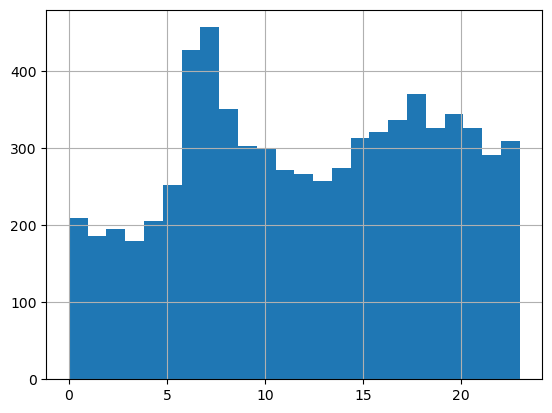

In [9]:
temp = pd.Series(df.Start)
temp.hist(histtype = 'stepfilled', bins = 24)

The graph shows that the starting hour in the data are quite spread apart. We can see that the most frequent start time is around 7 am while the least frequent is 3 am. However, it does show that there are data points for every start time which is a promizing sign for the data.

We also can see that some of the data types are ints while others are floats. Let's change everything to float to make our lives easier

In [10]:
df = df.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      7072 non-null   float64
 1   Start     7072 non-null   float64
 2   End       7072 non-null   float64
 3   TOD       7072 non-null   float64
 4   FIRMF     7072 non-null   float64
 5   Length    7072 non-null   float64
 6   Night     7072 non-null   float64
 7   Gap       7072 non-null   float64
 8   WS        7072 non-null   float64
 9   Idx       7072 non-null   float64
 10  Base      7072 non-null   float64
 11  StartAdj  7072 non-null   float64
 12  LenAdj    7072 non-null   float64
 13  Comp      7072 non-null   float64
 14  Trans     7072 non-null   float64
 15  Press     7072 non-null   float64
 16  P1S       7072 non-null   float64
 17  P1L       7072 non-null   float64
 18  P2S       7072 non-null   float64
 19  P2L       7072 non-null   float64
 20  MalAdj    7072 non-null   floa

We can also check the number of data items for each class using the value_counts() method

In [11]:
df["Class"].value_counts()

0.0    4866
1.0    1628
2.0     578
Name: Class, dtype: int64

It is clear that there are way more class 0 than both class 1 and class 2 data. It is also important to note that there are almost 3 times as many class 1 data compared to class 2 data items.

Now we need to check if the data contains any duplicates. If it does, we'll remove them from the dataframe

In [12]:
# check for duplicates
sum(df.duplicated())

141

In [13]:
# drop duplicates
df.drop_duplicates(inplace = True)

## Step 1: Checking if the 2 types of accidents are distinghuishable

Let's take a closer look into the data and see if there are any trends on where the accidents occur

In [14]:
start = df[df["Class"] != 0].groupby(["Start"])

In [15]:
accidents = start.size()
accidents

Start
0.0      78
1.0      73
2.0      75
3.0      75
4.0      73
5.0      70
6.0     138
7.0     123
8.0      83
9.0      87
10.0     85
11.0     77
12.0     86
13.0     74
14.0     96
15.0     80
16.0    110
17.0     93
18.0    118
19.0     98
20.0    106
21.0    104
22.0     87
23.0     68
dtype: int64

In [16]:
print(accidents.mean())

89.875


We can plot the number of accidents for each start time

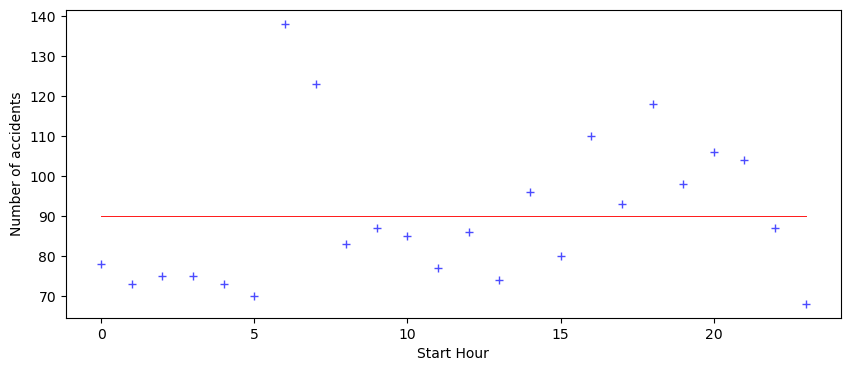

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plt.ylabel('Number of accidents')
plt.xlabel('Start Hour')
plt.plot(np.array(accidents), 'b+', lw=0.7, alpha=0.7)
plt.plot([accidents.mean()]*24, 'r', lw=0.7, alpha=0.9)
plt.show()

This plot actually shows us some important things. We can see that the number of accidents peaks at 7:00 am and we also have another peak at 18:00 pm. This got me thinking. Maybe we can do the same graphing that we did for start on every feature.

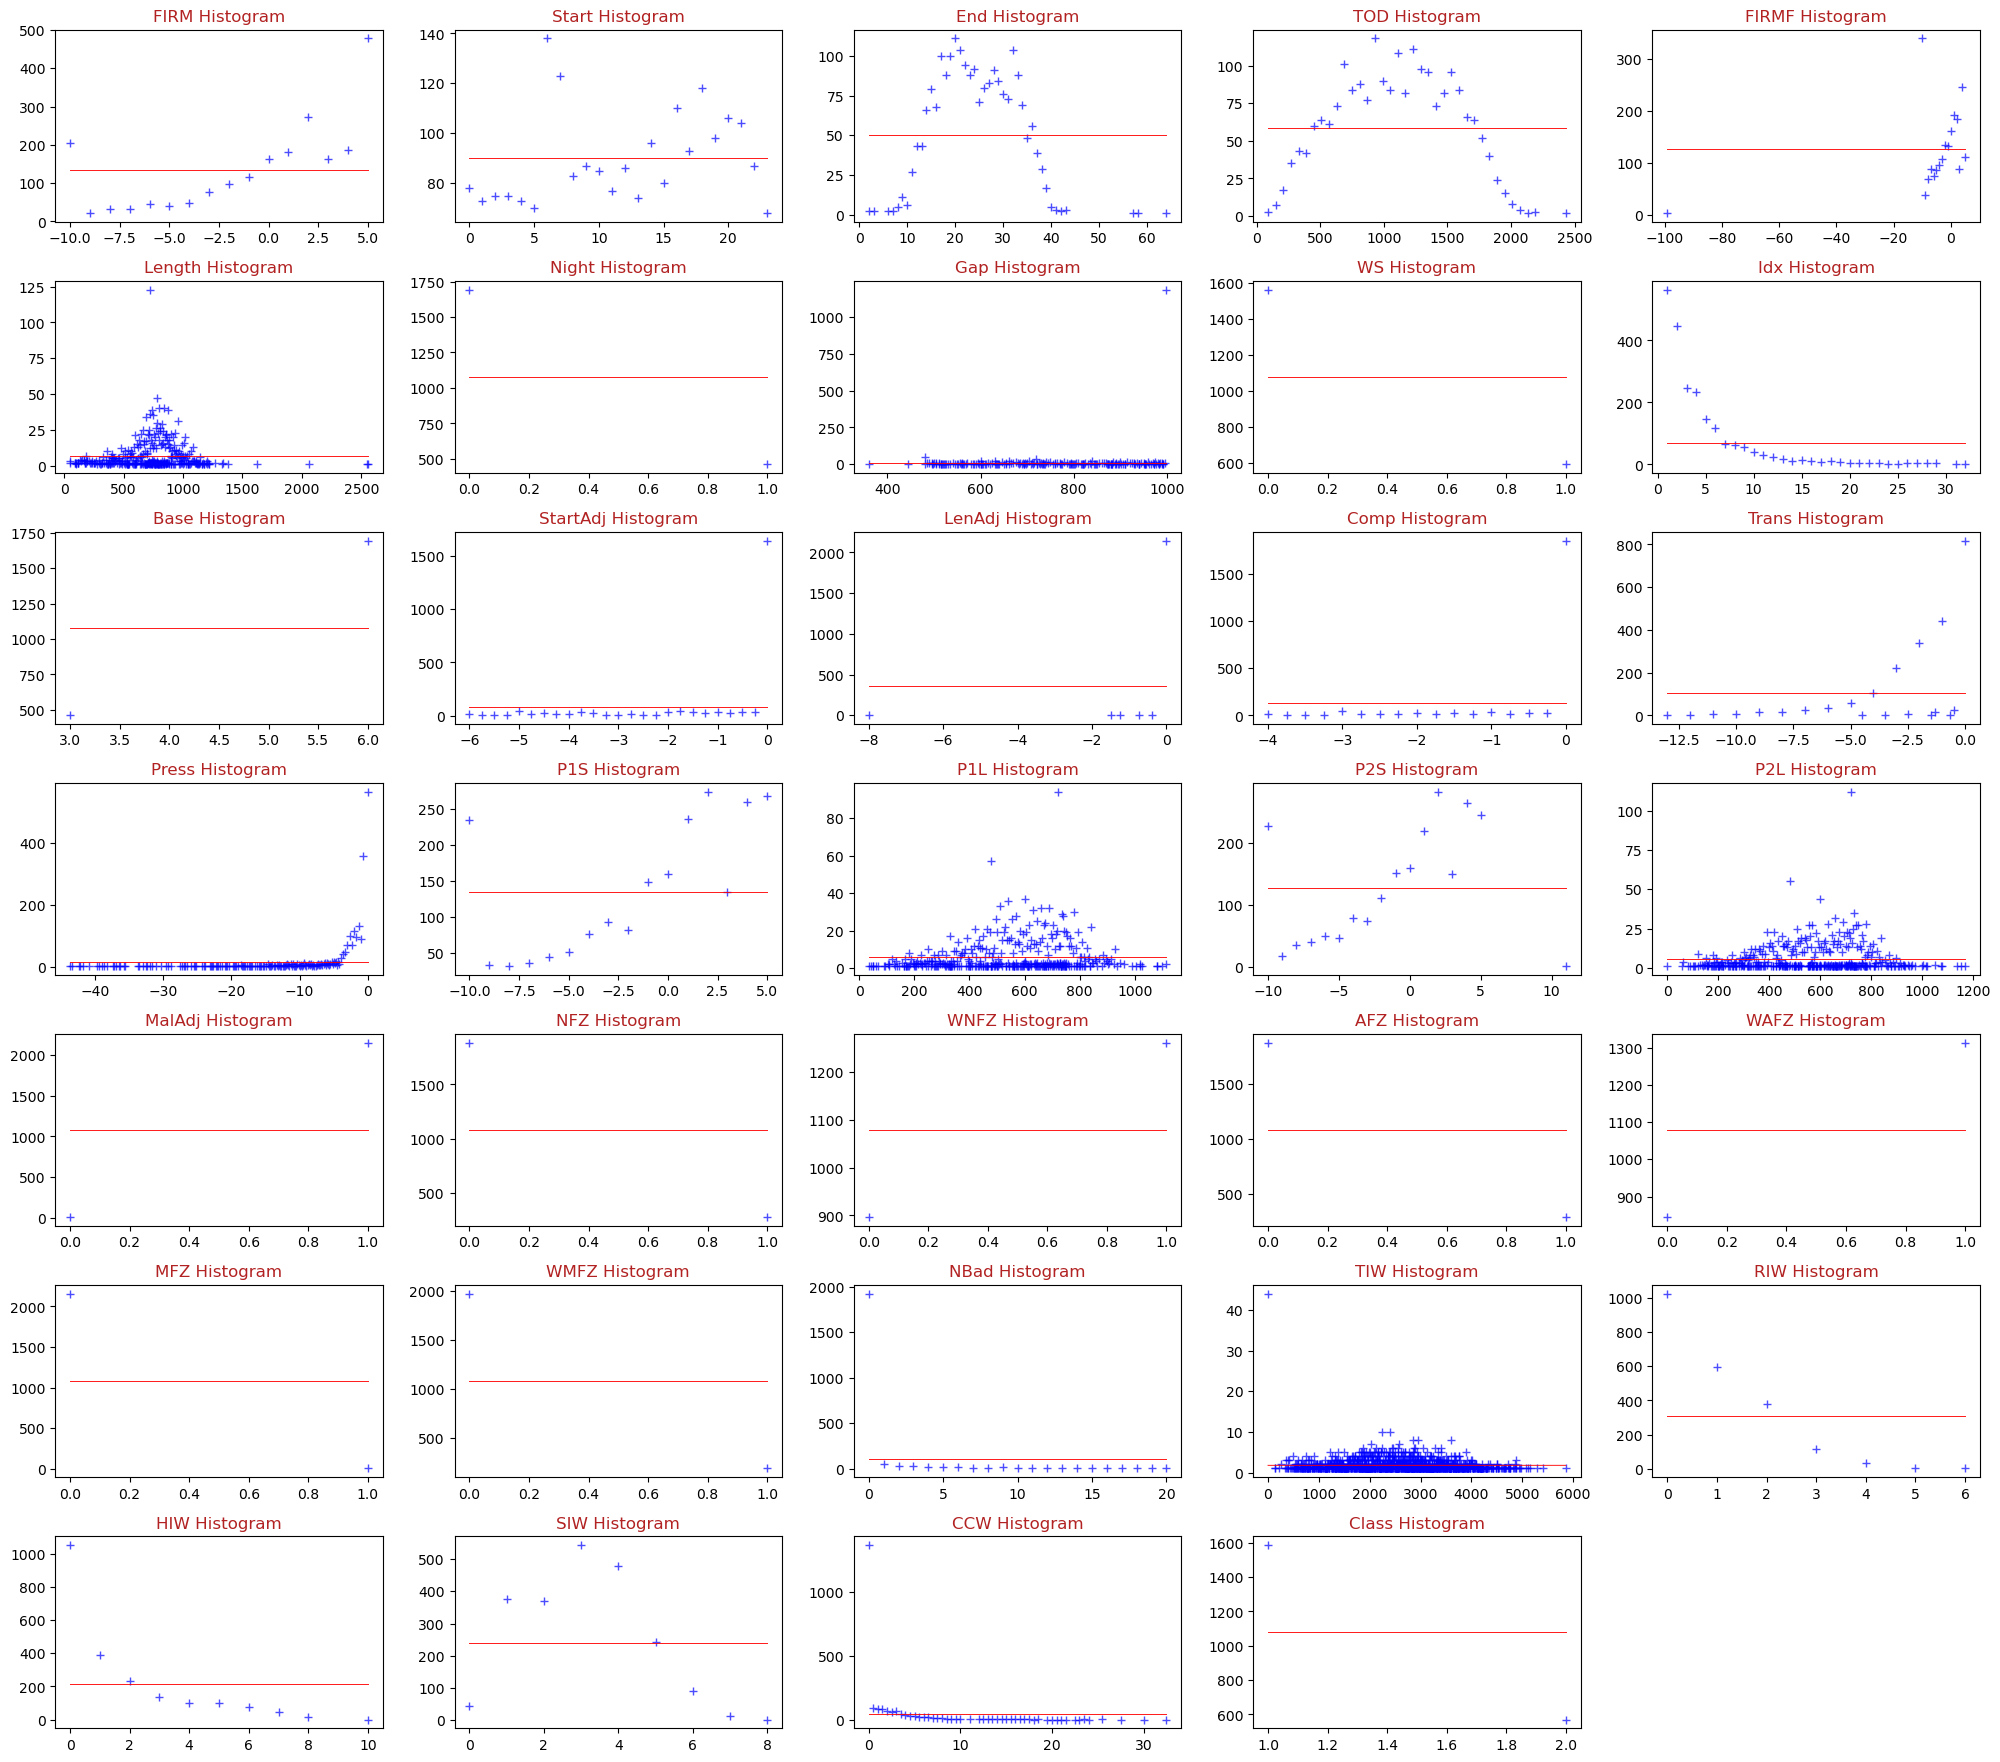

In [18]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    f = fig.add_subplot(8, 5, i + 1)
    
    accidents = df[df["Class"] != 0].groupby([feature]).size()
    mean = pd.Series(data=accidents.mean(), index=accidents.index.tolist())

    f.plot(accidents, 'b+', lw=0.7, alpha=0.7)
    f.plot(mean, 'r', lw=0.7, alpha=0.9)
    f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

Most of the features don't really tell much, mainly because they only have 2 distinct values (0 or 1) like MalAdj, NFZ, WNFZ, etc. The interesting features are FIRM, Start, End, and FIRMF. FIRM and FIRMF tell similar stories: the higer the value, the larger the number of accidents. We already saw Start before. End has a bell curve shape that peaks at around 25. However, I was suspicious if these are the trends for acccidents or just the trends of the data. So we'll plot the Class 0 as well.

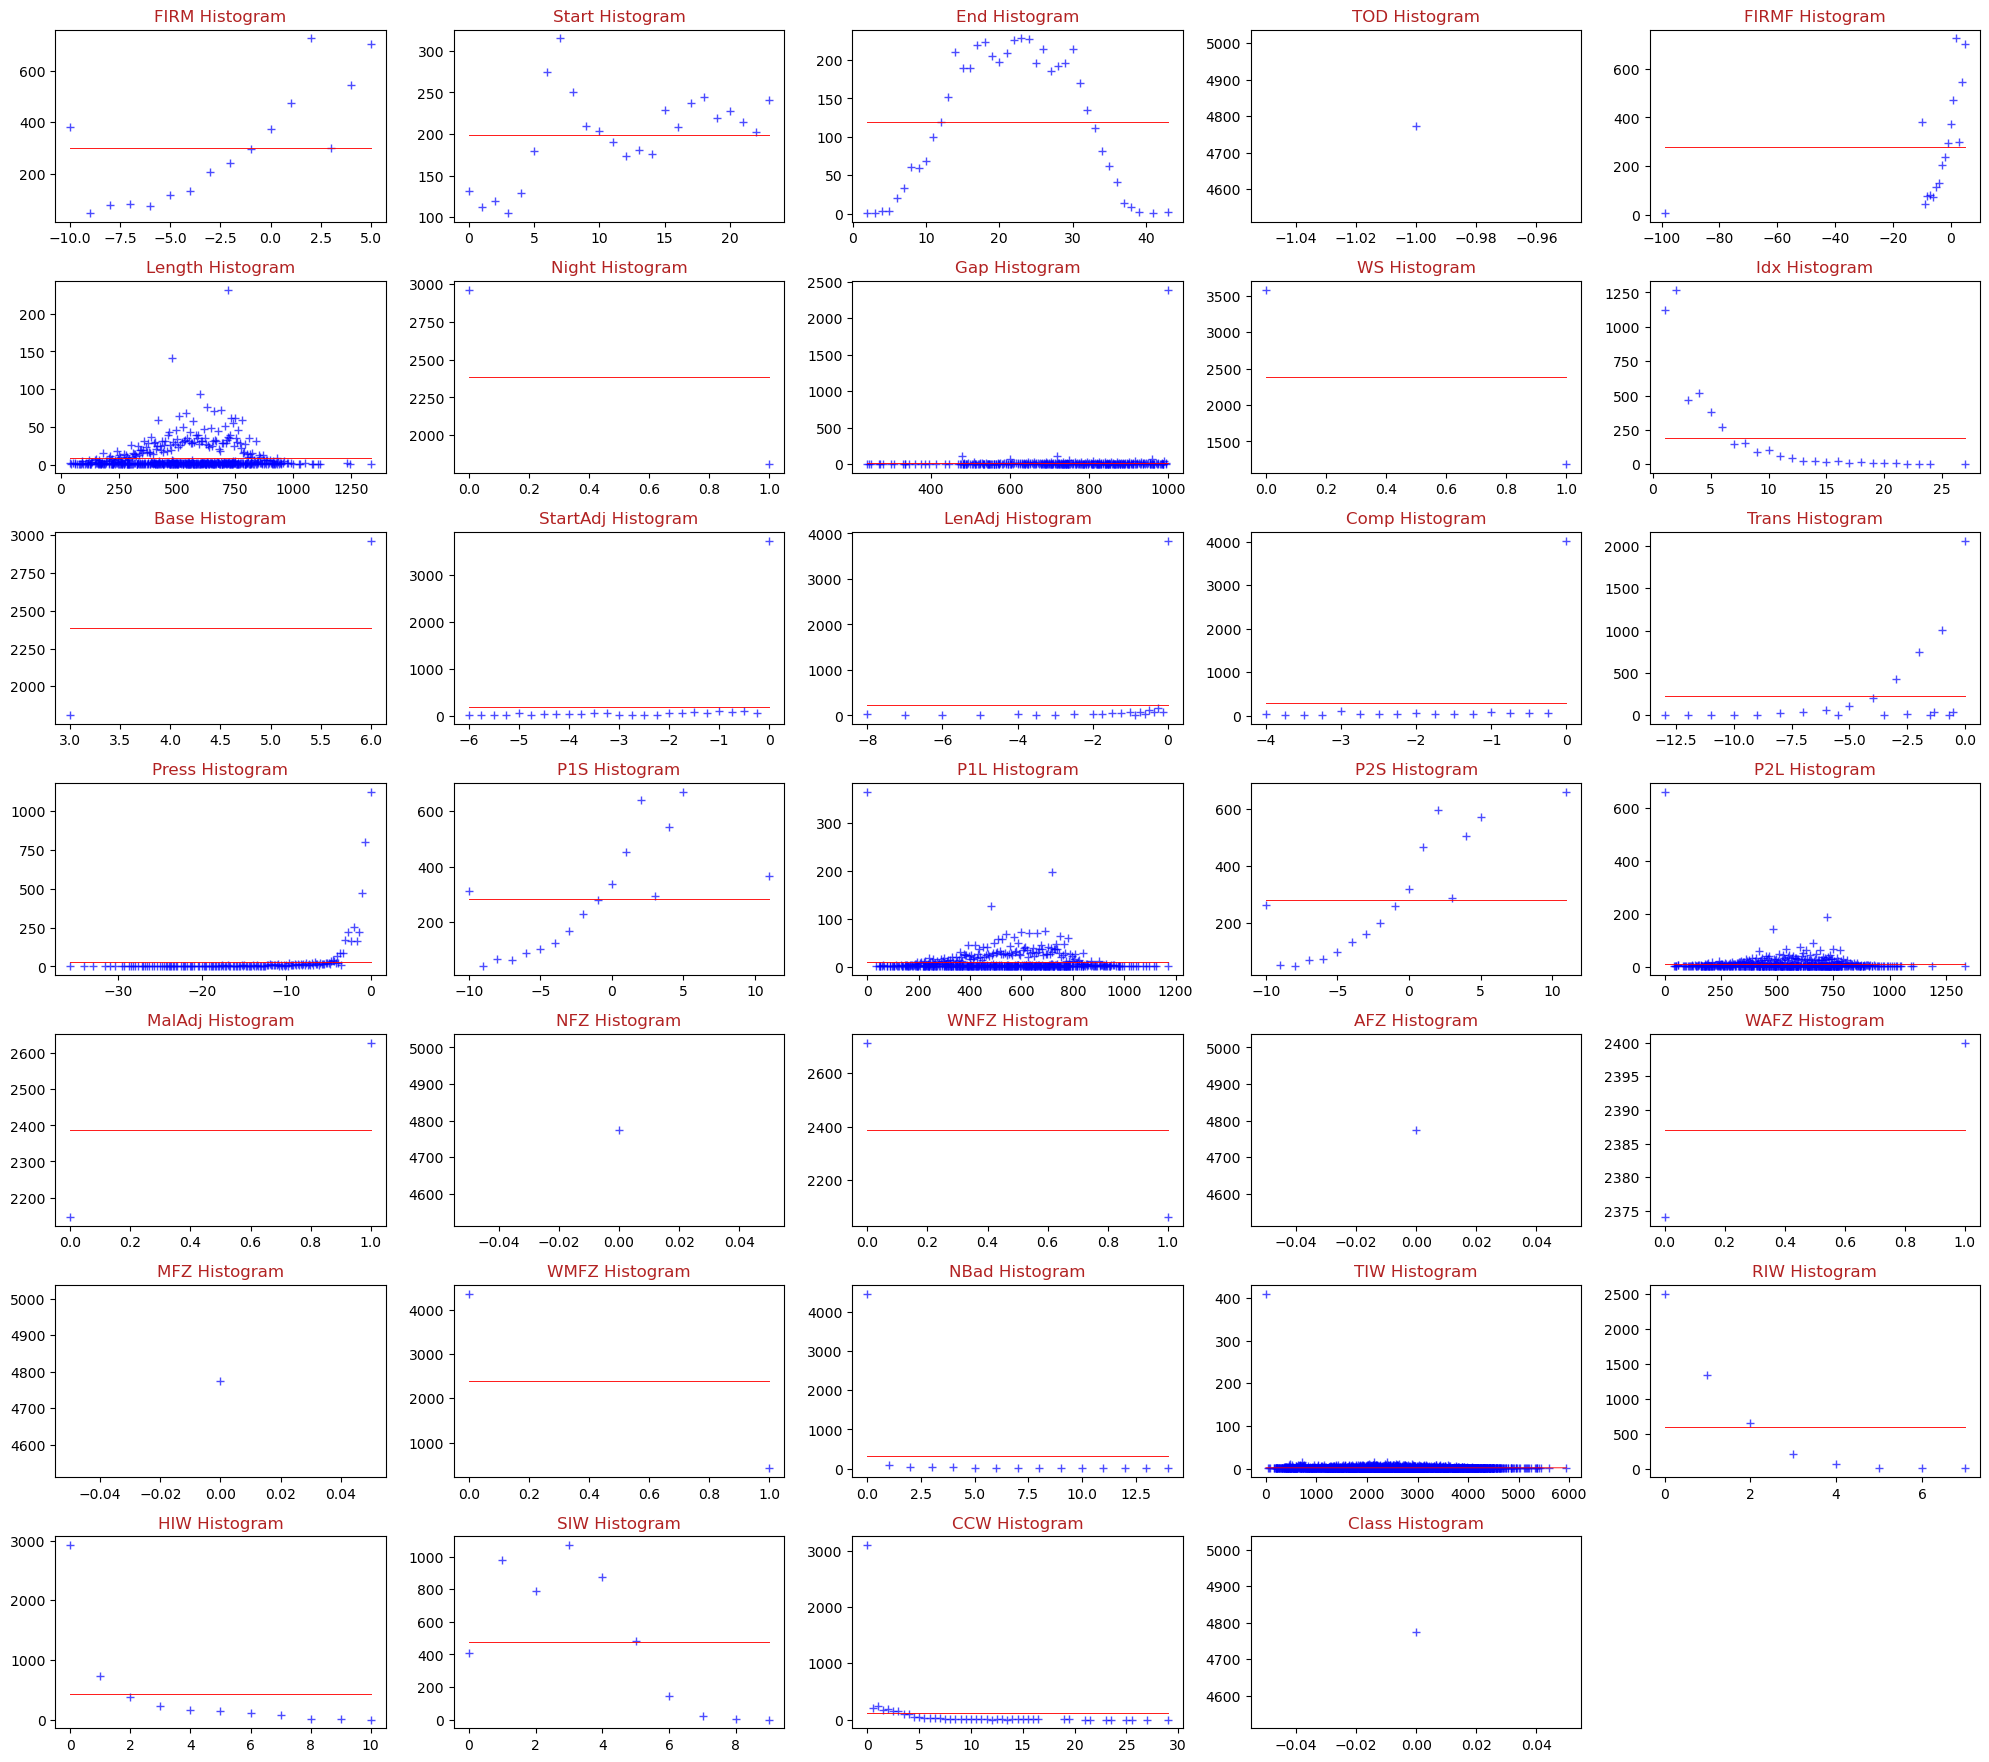

In [19]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    f = fig.add_subplot(8, 5, i + 1)
    
    accidents = df[df["Class"] == 0].groupby([feature]).size()
    mean = pd.Series(data=accidents.mean(), index=accidents.index.tolist())

    f.plot(accidents, 'b+', lw=0.7, alpha=0.7)
    f.plot(mean, 'r', lw=0.7, alpha=0.9)
    f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

As we can see, the trends are pretty much the same. Meaning that the peak of 7 and 18 in the Start plot was due to the larger number of samples that has a value of 7 or 18 within the data itself. The same goes for the other columns like FIRM, FIRMF, and End. Accident and no accident has the same distribution so we cannot really conclude if an accident happened at a particualr time or fatigue level using those measurements.

Now, we move back to the question of whether the classes are distinguishable or not. We can start by grouping the data into the nearest starting hour and looking at the number of accidents compared to the number of data samples in that group.

In [20]:
start = df.groupby(["Start"])
start.get_group(0)

,FIRM,Start,End,TOD,FIRMF,Length,Night,Gap,WS,Idx,...,WAFZ,MFZ,WMFZ,NBad,TIW,RIW,HIW,SIW,CCW,Class
31,-10.0,0.0,15.0,-1.0,-10.0,855.0,1.0,660.0,0.0,8.0,...,1.0,0.0,0.0,0.0,4104.0,1.0,4.0,4.0,2.5,0.0
62,-1.0,0.0,6.0,-1.0,-1.0,400.0,1.0,999.0,0.0,5.0,...,0.0,0.0,0.0,0.0,2138.0,1.0,0.0,4.0,0.0,0.0
113,-10.0,0.0,6.0,90.0,-10.0,390.0,0.0,870.0,0.0,25.0,...,0.0,0.0,0.0,14.0,3302.0,1.0,7.0,7.0,18.0,2.0
223,0.0,0.0,2.0,150.0,0.0,150.0,0.0,945.0,0.0,2.0,...,0.0,0.0,0.0,0.0,2115.0,0.0,2.0,2.0,0.0,1.0
232,-2.0,0.0,2.0,150.0,-1.0,150.0,0.0,765.0,0.0,4.0,...,0.0,0.0,0.0,0.0,2656.0,1.0,0.0,5.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6620,-10.0,0.0,12.0,-1.0,-10.0,735.0,1.0,985.0,0.0,11.0,...,0.0,0.0,0.0,1.0,3875.0,0.0,6.0,2.0,1.5,0.0
6623,-3.0,0.0,13.0,-1.0,-3.0,775.0,1.0,745.0,0.0,5.0,...,0.0,0.0,0.0,0.0,2342.0,1.0,1.0,4.0,4.0,0.0
6631,2.0,0.0,6.0,-1.0,2.0,375.0,1.0,999.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1364.0,1.0,1.0,2.0,0.0,0.0
6648,-10.0,0.0,6.0,-1.0,-10.0,375.0,1.0,520.0,0.0,12.0,...,0.0,0.0,0.0,0.0,2925.0,1.0,3.0,5.0,3.5,0.0


Now we can check for the probability of class 1 and class 2 accidents for each hour. There are multiple ways of doing this. We can look at the overall probability of a class 1 or class 2 acident happening for each hour. We can calculate this by (number of class 1) / (total). However, we only want the probability of class 1 or 2 given that an accident occurs to be able to distinguish the 2 classes. So we can use (number of class 1) / (number of accidents)

In [21]:
for key, val in start:
    print("For Hour", int(key))
    frame = start.get_group(key)
    rows = len(val)
    c0 = len(val[val["Class"] == 0])
    c1 = len(val[val["Class"] == 1])
    c2 = len(val[val["Class"] == 2])
    print("The percentage of class 0 accidents is %.2f" % (c0/rows))
    print("The percentage of class 1 accidents is %.2f" % (c1/rows))
    print("The percentage of class 2 accidents is %.2f" % (c2/rows))
    print("The percentage of class 1 compared to class 2 is %.2f" % (c1 / (c1 + c2)))
    print("The percentage of class 2 compared to class 1 is %.2f" % (c2 / (c1 + c2)))

For Hour 0
The percentage of class 0 accidents is 0.63
The percentage of class 1 accidents is 0.31
The percentage of class 2 accidents is 0.07
The percentage of class 1 compared to class 2 is 0.82
The percentage of class 2 compared to class 1 is 0.18
For Hour 1
The percentage of class 0 accidents is 0.61
The percentage of class 1 accidents is 0.28
The percentage of class 2 accidents is 0.12
The percentage of class 1 compared to class 2 is 0.70
The percentage of class 2 compared to class 1 is 0.30
For Hour 2
The percentage of class 0 accidents is 0.61
The percentage of class 1 accidents is 0.29
The percentage of class 2 accidents is 0.09
The percentage of class 1 compared to class 2 is 0.76
The percentage of class 2 compared to class 1 is 0.24
For Hour 3
The percentage of class 0 accidents is 0.58
The percentage of class 1 accidents is 0.32
The percentage of class 2 accidents is 0.09
The percentage of class 1 compared to class 2 is 0.77
The percentage of class 2 compared to class 1 is 0

We can see that in every case class 1 is more probable than class 2. Even when we compared class 1 and 2 to the number of accidents instead of the number of data points, we can see that given an accident, class 1 is still more probable than class 2. As indicated above, there are 3 times more class 1 accident than class 2. However, the probability of a class 1 ranges from 2 to 6 times higher. We're not sure yet if they are distinguishable or not, so let's use a logistic regression to check.

## Step 1 Part 2: Logistic regression on data

To do that we need to first perform a logistic regression on the whole dataset as a benchmark

We'll first split the data and the target

In [22]:
X = df.drop("Class", axis=1, inplace=False)
Y = df["Class"].copy()

In [23]:
print(X.shape)
print(X)

(6931, 33)
      FIRM  Start   End     TOD  FIRMF  Length  Night    Gap   WS   Idx  ...  \
0     -3.0    2.0  11.0    -1.0   -3.0   510.0    0.0  750.0  0.0   5.0  ...   
1      5.0   15.0  21.0    -1.0    5.0   375.0    0.0  855.0  0.0   2.0  ...   
2      1.0   18.0  31.0  1470.0   -2.0   735.0    0.0  999.0  0.0   5.0  ...   
3      4.0   11.0  21.0    -1.0    4.0   595.0    0.0  605.0  0.0   2.0  ...   
4      3.0    5.0  17.0    -1.0    3.0   719.0    0.0  999.0  1.0   1.0  ...   
...    ...    ...   ...     ...    ...     ...    ...    ...  ...   ...  ...   
7067  -1.0    3.0  14.0    -1.0   -1.0   630.0    0.0  999.0  0.0   2.0  ...   
7068   5.0   20.0  33.0  1410.0    0.0   785.0    0.0  999.0  1.0   1.0  ...   
7069   5.0   20.0  22.0    -1.0    5.0   164.0    0.0  999.0  0.0   3.0  ...   
7070   5.0   15.0  24.0    -1.0    5.0   540.0    0.0  999.0  0.0   2.0  ...   
7071  -7.0   20.0  33.0  1410.0  -10.0   790.0    0.0  999.0  0.0  10.0  ...   

      AFZ  WAFZ  MFZ  WMFZ  

In [24]:
print(Y.shape)
print(Y)

(6931,)
0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
7067    0.0
7068    1.0
7069    0.0
7070    0.0
7071    1.0
Name: Class, Length: 6931, dtype: float64


#### Next, we need to check if we need to scale the values

In [25]:
X.describe()

,FIRM,Start,End,TOD,FIRMF,Length,Night,Gap,WS,Idx,...,AFZ,WAFZ,MFZ,WMFZ,NBad,TIW,RIW,HIW,SIW,CCW
count,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.00000,6931.000000,...,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000
mean,0.079065,12.242678,22.690521,338.920214,-0.825566,628.278315,0.327803,874.633531,0.25725,4.004761,...,0.041408,0.535709,0.000289,0.087722,0.366181,2250.782715,0.793536,1.154523,2.778820,1.262949
std,4.529790,6.645592,7.381749,562.427884,6.345990,203.238775,0.469446,165.408490,0.43715,3.843941,...,0.199247,0.498759,0.016986,0.282910,1.725650,1154.831153,0.999968,1.832822,1.586466,2.811824
min,-10.000000,0.000000,2.000000,-1.000000,-99.000000,40.000000,0.000000,240.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.000000,7.000000,17.000000,-1.000000,-3.000000,490.000000,0.000000,750.000000,0.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1475.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,12.000000,23.000000,-1.000000,1.000000,655.000000,0.000000,999.000000,0.00000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,2340.000000,0.000000,0.000000,3.000000,0.000000
75%,4.000000,18.000000,29.000000,690.000000,3.000000,755.000000,1.000000,999.000000,1.00000,5.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,3069.000000,1.000000,2.000000,4.000000,1.500000
max,5.000000,23.000000,64.000000,2430.000000,5.000000,2555.000000,1.000000,999.000000,1.00000,32.000000,...,1.000000,1.000000,1.000000,1.000000,20.000000,5945.000000,7.000000,10.000000,9.000000,32.500000


We can see that some column have really large values like "TOD" and "Length" while others have only values between 0 and 1 like WS, AFZ, WAFZ. So we need to scale the values

In [26]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [27]:
X_scaled.head()

,FIRM,Start,End,TOD,FIRMF,Length,Night,Gap,WS,Idx,...,AFZ,WAFZ,MFZ,WMFZ,NBad,TIW,RIW,HIW,SIW,CCW
0,-0.679786,-1.541385,-1.583820,-0.604424,-0.342672,-0.582009,-0.698325,-0.753544,-0.588513,0.258930,...,-0.207839,-1.074161,-0.016989,-0.310092,-0.212214,0.015776,0.206485,-0.629961,0.139427,0.262144
1,1.086428,0.414940,-0.229030,-0.604424,0.918058,-1.246301,-0.698325,-0.118706,-0.588513,-0.521576,...,-0.207839,0.930959,-0.016989,-0.310092,-0.212214,-1.546470,-0.793619,-0.629961,-1.121328,-0.093522
2,0.203321,0.866399,1.125760,2.011211,-0.185080,0.525143,-0.698325,0.751929,-0.588513,0.258930,...,-0.207839,-1.074161,-0.016989,-0.310092,-0.212214,0.523246,1.206590,-0.629961,1.400182,-0.449189
3,0.865651,-0.187006,-0.229030,-0.604424,0.760467,-0.163752,-0.698325,-1.630225,-0.588513,-0.521576,...,-0.207839,0.930959,-0.016989,-0.310092,-0.212214,-0.801719,-0.793619,-0.629961,-0.490950,0.084311
4,0.644874,-1.089925,-0.770946,-0.604424,0.602876,0.446412,-0.698325,0.751929,1.699196,-0.781744,...,-0.207839,0.930959,-0.016989,3.224852,-0.212214,0.158664,1.206590,-0.629961,0.769804,-0.449189


Now that the data is scaled, we can split the data and target into training and testing datasets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=38, stratify=Y)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5544, 33)
(5544,)
(1387, 33)
(1387,)


In [30]:
print(y_test.value_counts())

0.0    955
1.0    318
2.0    114
Name: Class, dtype: int64


Before doing the logistic regression, let's first visualize the our data. Let's first see a log plot of each of the features

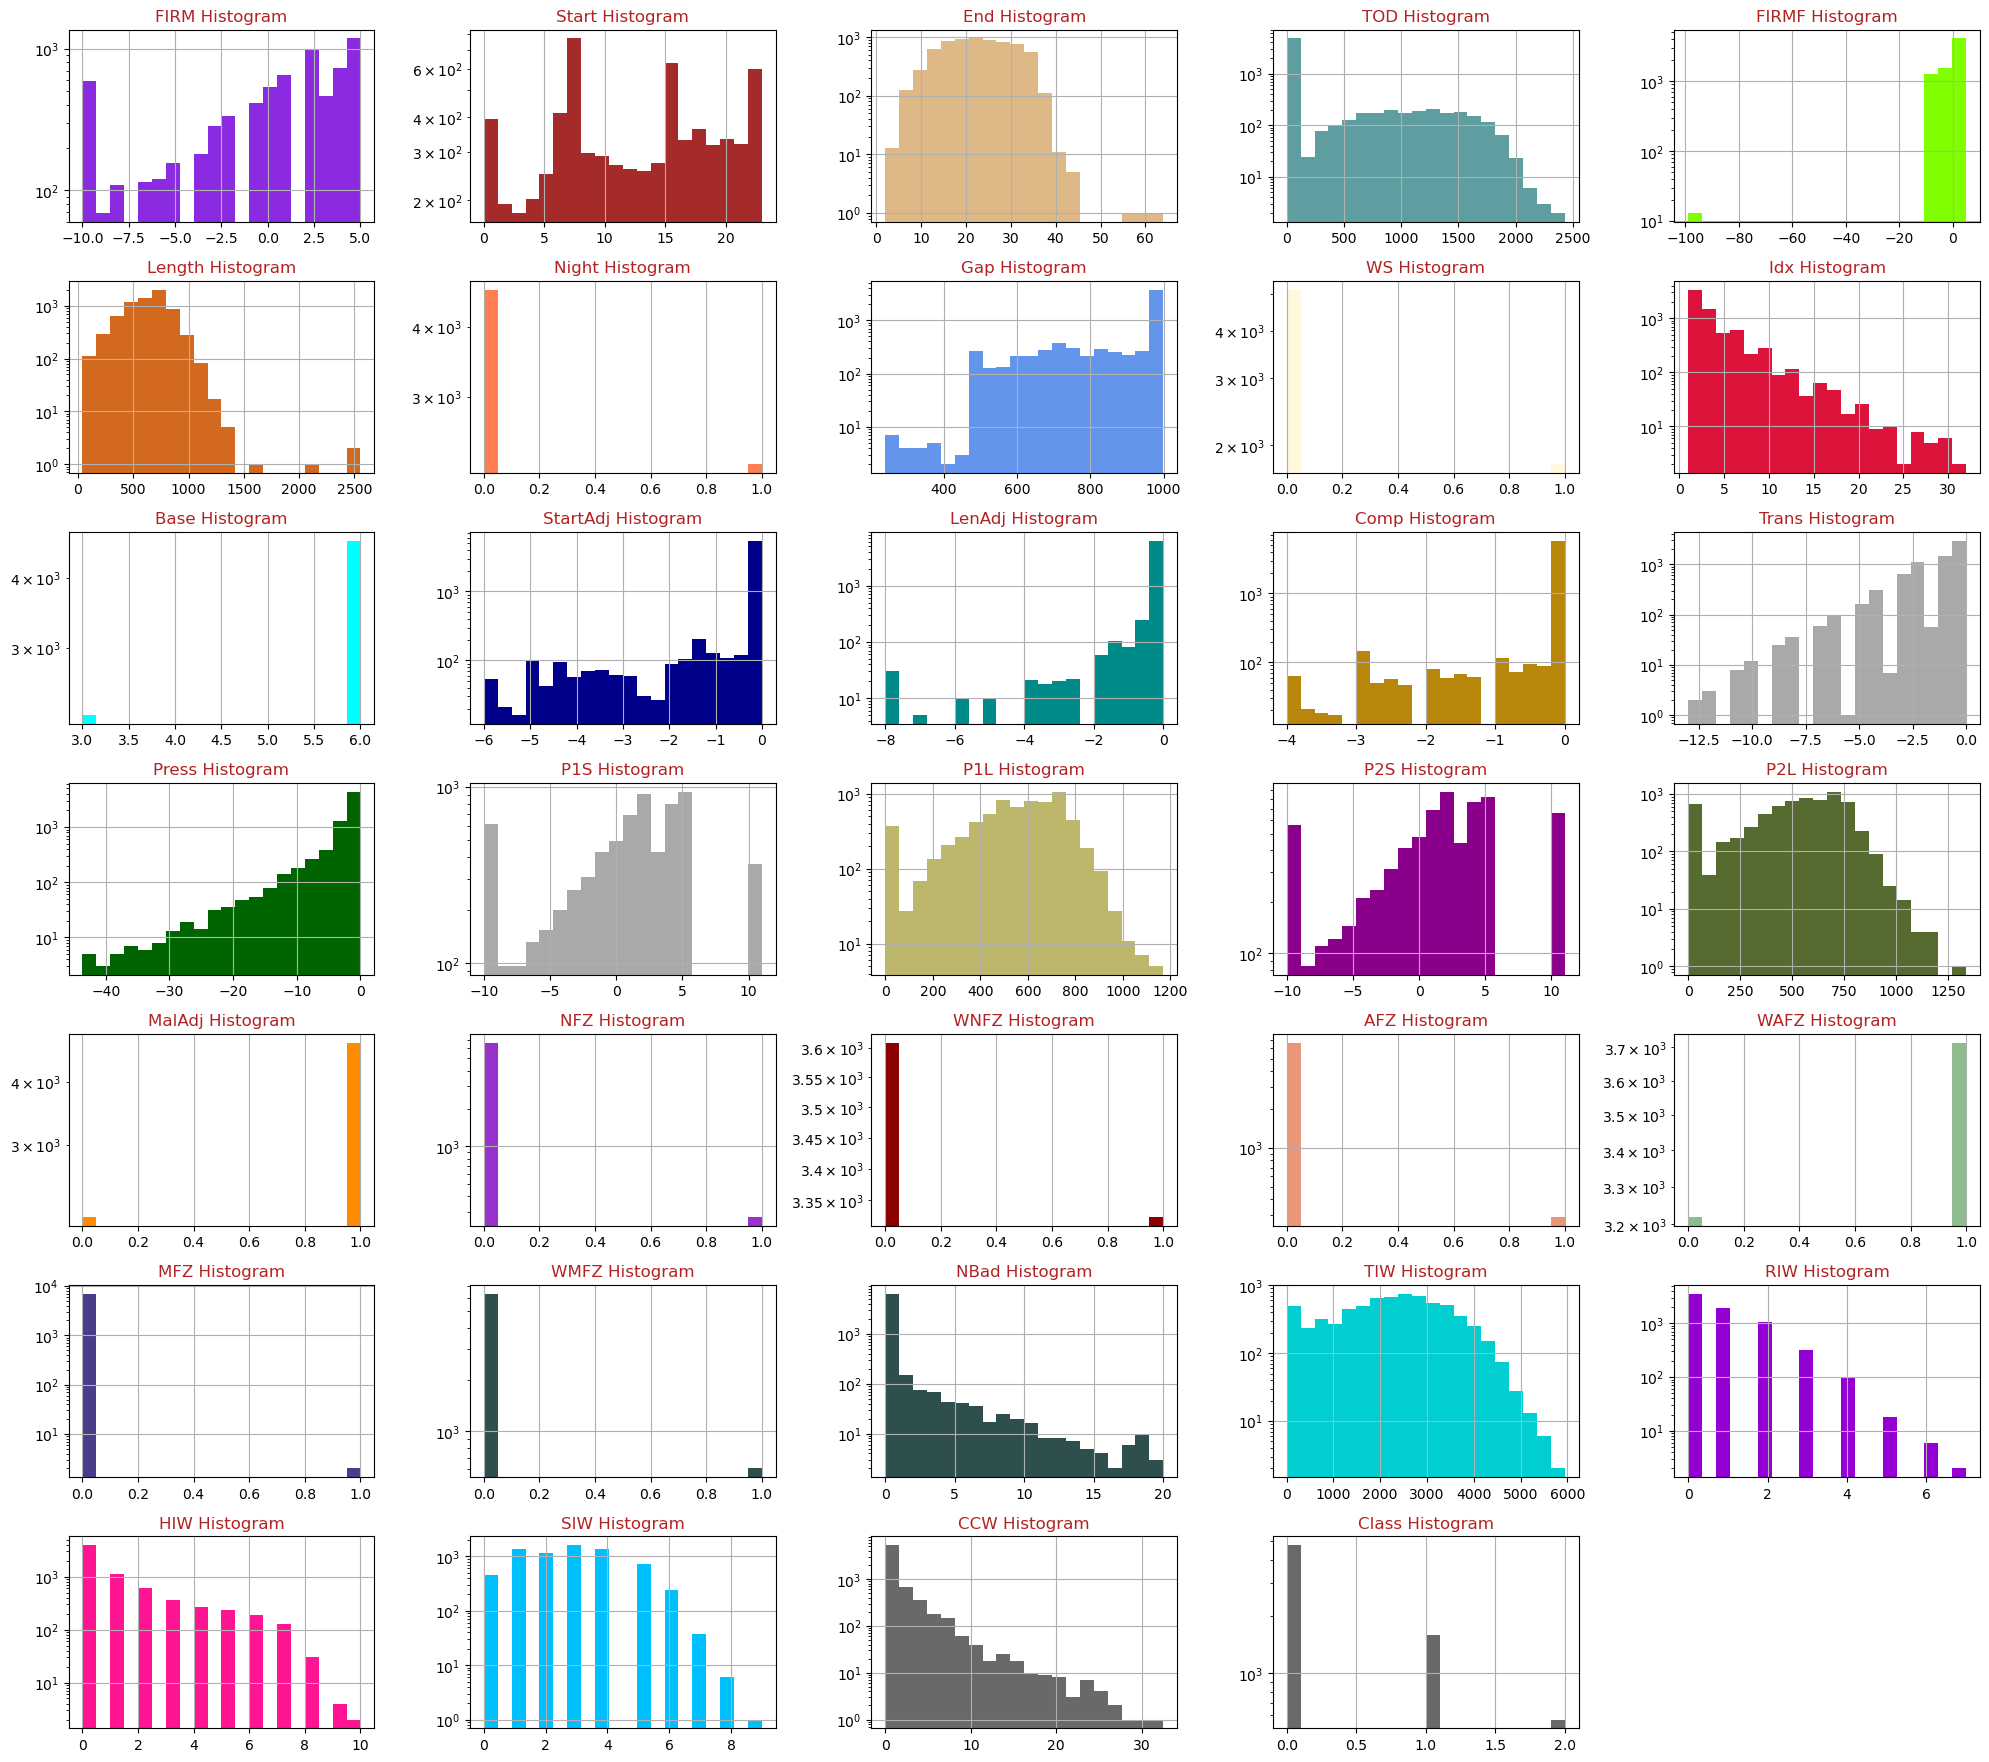

In [31]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    f = fig.add_subplot(8, 5, i + 1)
    df[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
    f.set_yscale('log')
fig.tight_layout()
plt.show()

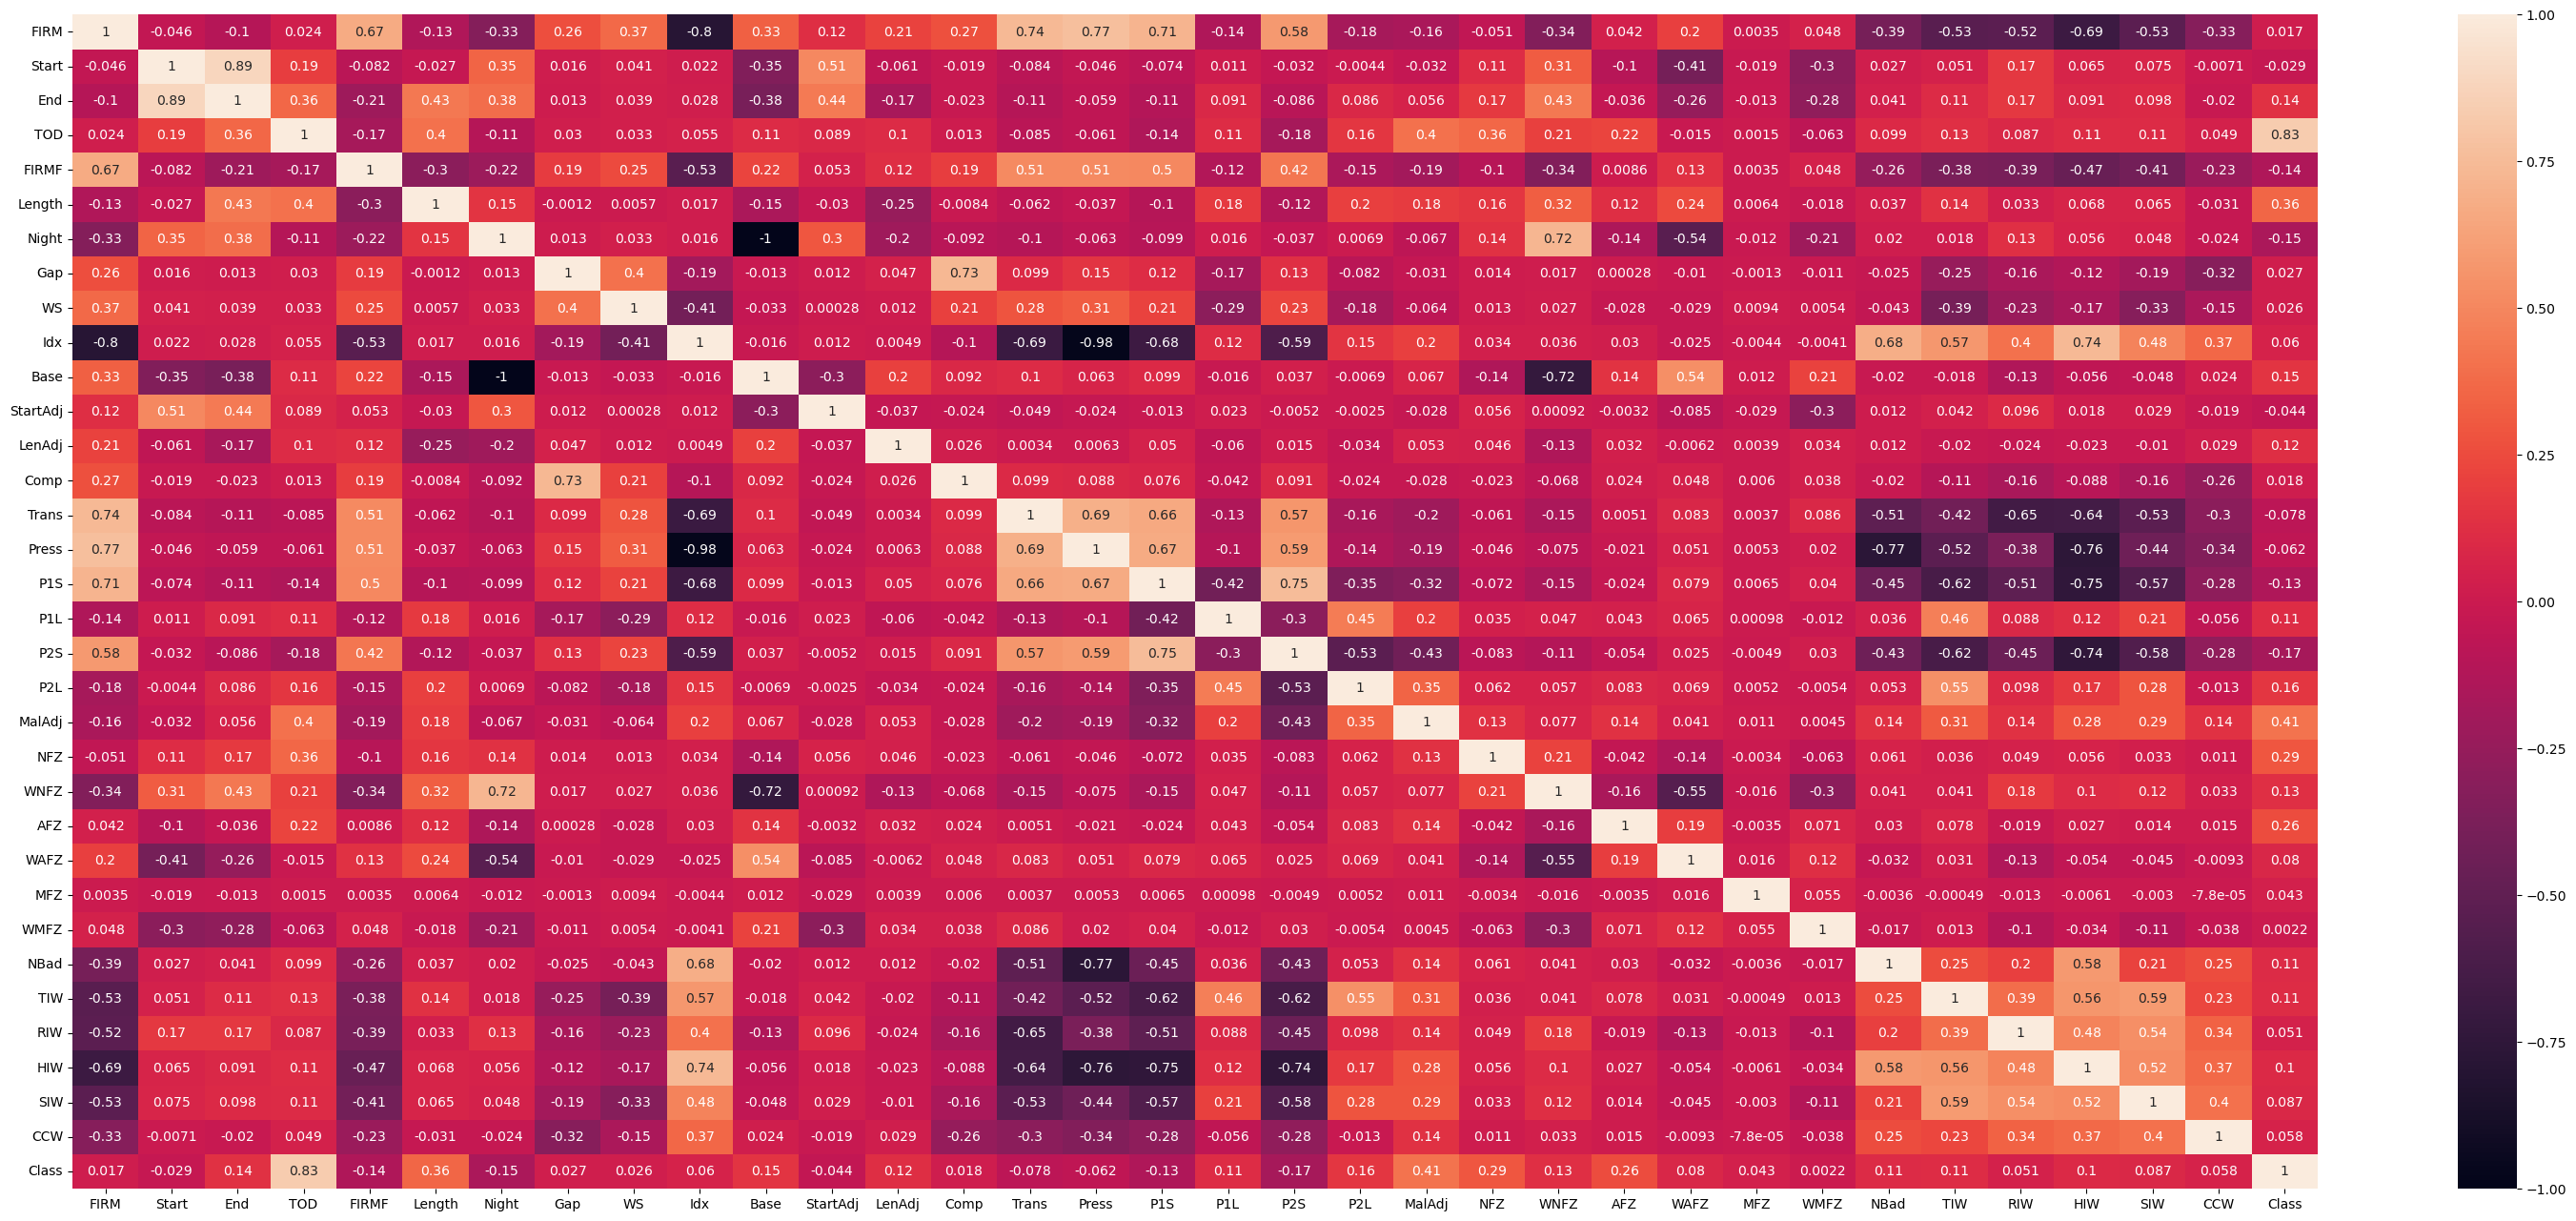

In [32]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 91.77%
The accuracy for the test set is 91.78%


We can see that we obtained a high accuracy for both the training and testing data. However, we can also see form the plots that class 0 is about twice as large as class 1, and there are very few samples that are class 2. So, it is possible that the model can accurately predict class 0 and class 1, but not able to predict class 2. In other words, the model never predicts class 2 because there are very few class 2 data. We can use a confusion matrix to test out theory.

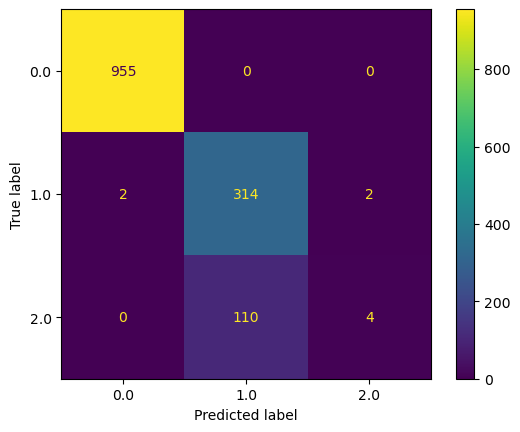

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot()
plt.show()

As we can see, our hypothesis was correct. The model was predicting class 2 accidents as class 1 accidents. This got me thinking, what would happen if we just use class 1 and class 2 data in the logistic regression? If our goal is to if the 2 classes are distinguishable, then we could just see if we can sue a logistic regression to differentiate the 2. In other words, we want to find a linear model that can differentiate the 2 classes.

## Step 1 Part 3: Using only 2 classes

Let's drop all class 0 rows and only keep the class 1 and class 2 rows

In [35]:
df_accidents = df.loc[df["Class"] != 0]

In [36]:
df_accidents.head()

,FIRM,Start,End,TOD,FIRMF,Length,Night,Gap,WS,Idx,...,WAFZ,MFZ,WMFZ,NBad,TIW,RIW,HIW,SIW,CCW,Class
2,1.0,18.0,31.0,1470.0,-2.0,735.0,0.0,999.0,0.0,5.0,...,0.0,0.0,0.0,0.0,2855.0,2.0,0.0,5.0,0.0,1.0
5,-8.0,18.0,31.0,1470.0,-10.0,735.0,0.0,999.0,0.0,9.0,...,0.0,0.0,0.0,0.0,2959.0,2.0,2.0,4.0,0.0,1.0
9,-2.0,18.0,33.0,1470.0,-8.0,870.0,0.0,885.0,0.0,8.0,...,0.0,0.0,0.0,0.0,2845.0,2.0,1.0,5.0,3.0,2.0
13,-1.0,18.0,33.0,1470.0,-7.0,885.0,0.0,885.0,0.0,6.0,...,0.0,0.0,0.0,0.0,2084.0,2.0,1.0,3.0,2.5,2.0
15,4.0,14.0,34.0,1470.0,-8.0,1200.0,0.0,975.0,0.0,4.0,...,1.0,0.0,0.0,0.0,3225.0,0.0,0.0,4.0,1.0,1.0


Now we can perform the same logistic regression to see if class 1 and class 2 can be differentiated.

In [37]:
X = df_accidents.drop("Class", axis=1, inplace=False)
Y = df_accidents["Class"].copy()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=38, stratify=Y)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
train_accuracy = model.score(X_train, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 74.67%
The accuracy for the test set is 71.76%


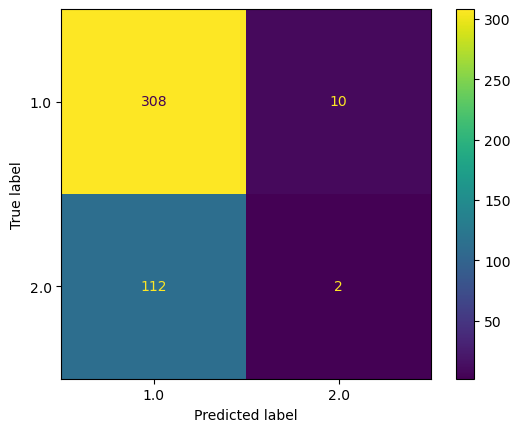

In [39]:
y_pred = model.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot()
plt.show()

As we can see, we get the same results. The logistic regession was still not able to differentiate between class 1 and class 2 evidence. Although class 1 data items are still 3 times more common than class 2, there are still enough class 2 items for the model to get a higher prediction on class 2 accidents. In fact, having 114 out of 432 labels should be enough for the logistic regression to predict class 2 obejcts more.

## Step 1 Part 4: Revising our hypothesis

From the logistic regression, we can see that the model was able to differentiate between no accident and an accident. However, when we changed the data to only include accidents, the logistic regression was not able to find a difference between class 1 and class 2 accidents. As we saw in part 1, although the difference in probability in the bins between class 1 and class 2 is high, the large disparity between the probability could be just noise in the data. This means that the 2 accidents are more likely to be indistinguisable.

## Step 2: Which features are important

Now that we did a logistic regression on al of them, we can start looking for which features are most important for the model. We can look at the heatmap again to see which features had a high correlation with 'Class'

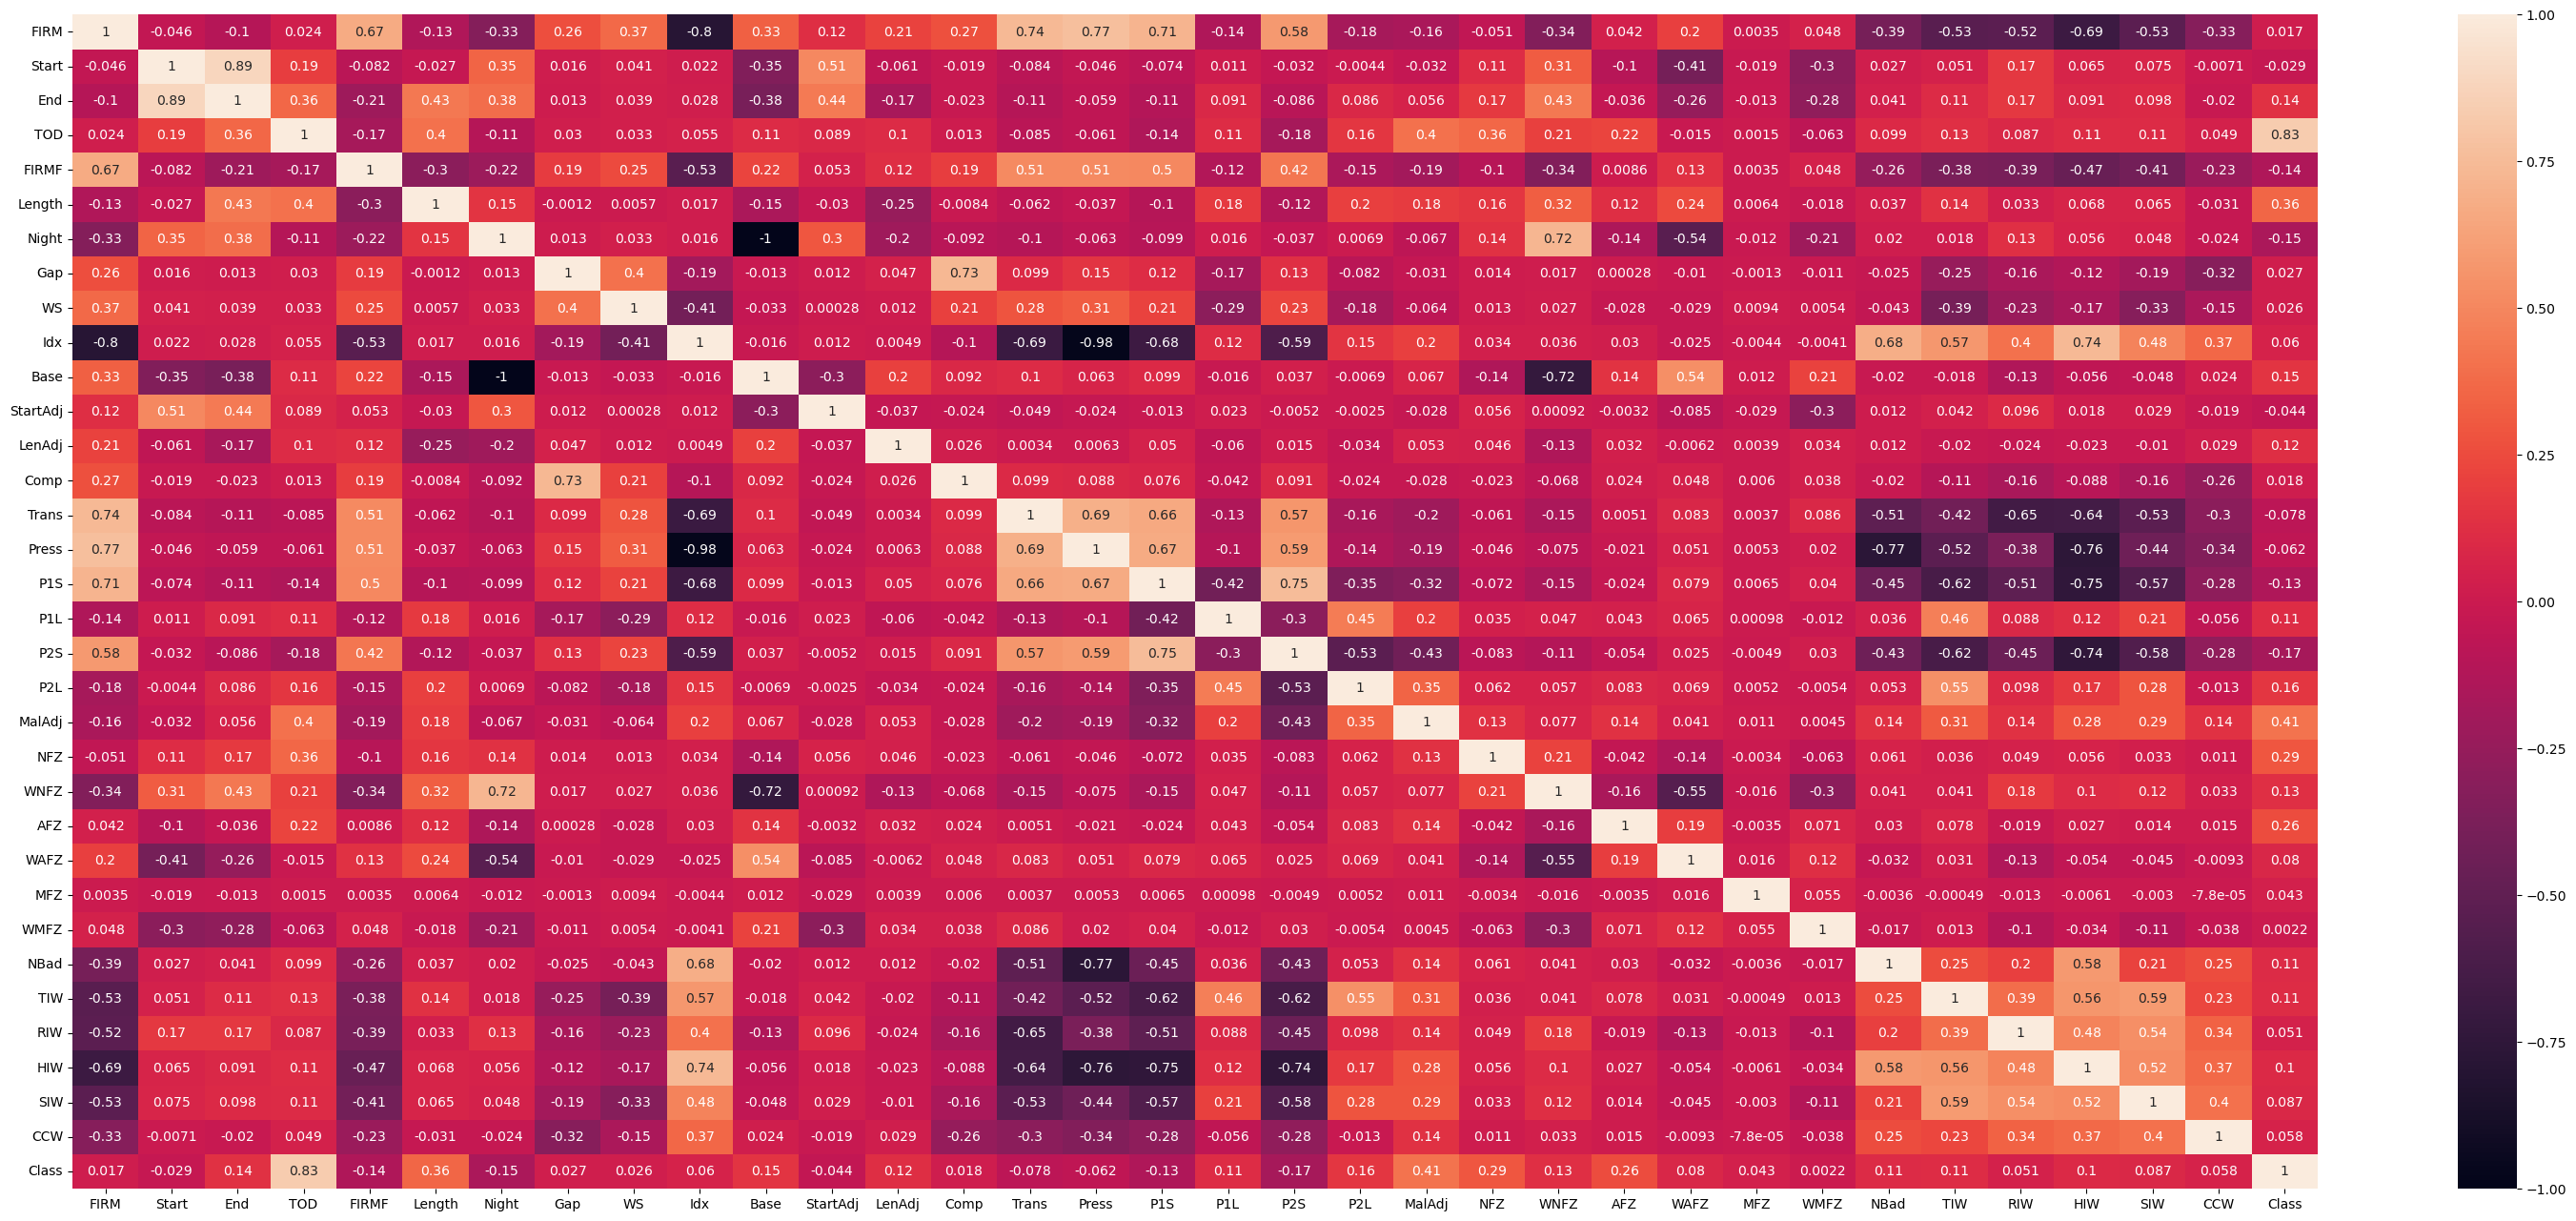

In [40]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

Before we start testing, we need to change our dataframe to combine class 1 and class 2 data items since we showed that the the 2 classes are indistinguishable. To do that we can just change every value of 2 in the "Class" column, into 1.

In [41]:
df.loc[df['Class'] == 2, 'Class'] = 1

In [42]:
df.head()

,FIRM,Start,End,TOD,FIRMF,Length,Night,Gap,WS,Idx,...,WAFZ,MFZ,WMFZ,NBad,TIW,RIW,HIW,SIW,CCW,Class
0,-3.0,2.0,11.0,-1.0,-3.0,510.0,0.0,750.0,0.0,5.0,...,0.0,0.0,0.0,0.0,2269.0,1.0,0.0,3.0,2.0,0.0
1,5.0,15.0,21.0,-1.0,5.0,375.0,0.0,855.0,0.0,2.0,...,1.0,0.0,0.0,0.0,465.0,0.0,0.0,1.0,1.0,0.0
2,1.0,18.0,31.0,1470.0,-2.0,735.0,0.0,999.0,0.0,5.0,...,0.0,0.0,0.0,0.0,2855.0,2.0,0.0,5.0,0.0,1.0
3,4.0,11.0,21.0,-1.0,4.0,595.0,0.0,605.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1325.0,0.0,0.0,2.0,1.5,0.0
4,3.0,5.0,17.0,-1.0,3.0,719.0,0.0,999.0,1.0,1.0,...,1.0,0.0,1.0,0.0,2434.0,2.0,0.0,4.0,0.0,0.0


Now, we can test the logistic regression by using only 1 column feature to predict the class. Any feature that is important to the classificaiton will still score a high accuracy. I also used the F1-score since the classes are quite imbalanced. So to prevent the model form getting a high accuracy by ust predicting a no accident in every data point, the f1-score will be used to evaluate the model.

In [43]:
def useColumn(df, colName, f1=[], random=False):
    print("----Using the " + str(colName) + " column----")
    # get column
    X = df[colName].copy()
    # drop "Class"
    Y = df["Class"].copy()

    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
    if random:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, stratify=Y)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=38, stratify=Y)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    train_accuracy = model.score(X_train, y_train)
    print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test, y_test)
    print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')
    y_pred = model.predict(X_test)
    test_f1 = f1_score(y_test, y_pred)
    print(f'The F1-score for the test set is {100 * test_f1:.2f}%')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print()
    f1.append(test_f1)

In [44]:
oneColumnF1 = []
for columnName in df.columns:
    if (columnName != "Class"):
        useColumn(df, [columnName], oneColumnF1)

----Using the ['FIRM'] column----
The accuracy for the training set is 68.89%
The accuracy for the test set is 68.85%
The F1-score for the test set is 0.00%
[[955   0]
 [432   0]]

----Using the ['Start'] column----
The accuracy for the training set is 68.89%
The accuracy for the test set is 68.85%
The F1-score for the test set is 0.00%
[[955   0]
 [432   0]]

----Using the ['End'] column----
The accuracy for the training set is 68.94%
The accuracy for the test set is 69.07%
The F1-score for the test set is 1.38%
[[955   0]
 [429   3]]

----Using the ['TOD'] column----
The accuracy for the training set is 99.62%
The accuracy for the test set is 99.57%
The F1-score for the test set is 99.30%
[[955   0]
 [  6 426]]

----Using the ['FIRMF'] column----
The accuracy for the training set is 68.81%
The accuracy for the test set is 68.78%
The F1-score for the test set is 0.46%
[[953   2]
 [431   1]]

----Using the ['Length'] column----
The accuracy for the training set is 76.44%
The accuracy f

In [45]:
UseOnef1Dict = dict(zip(list(df.columns)[:-1], oneColumnF1))
# sort ditionary by value
sorted_UseOnef1Dict = sorted(UseOnef1Dict.items(), key=lambda x:x[1], reverse=True)
print(sorted_UseOnef1Dict)

[('TOD', 0.993006993006993), ('Length', 0.5475841874084919), ('AFZ', 0.26506024096385544), ('NFZ', 0.25806451612903225), ('P2S', 0.1561904761904762), ('NBad', 0.052980132450331126), ('Press', 0.018306636155606407), ('CCW', 0.018306636155606407), ('End', 0.013793103448275862), ('Idx', 0.013761467889908256), ('Trans', 0.013761467889908256), ('P2L', 0.009216589861751152), ('FIRMF', 0.004597701149425287), ('FIRM', 0.0), ('Start', 0.0), ('Night', 0.0), ('Gap', 0.0), ('WS', 0.0), ('Base', 0.0), ('StartAdj', 0.0), ('LenAdj', 0.0), ('Comp', 0.0), ('P1S', 0.0), ('P1L', 0.0), ('MalAdj', 0.0), ('WNFZ', 0.0), ('WAFZ', 0.0), ('MFZ', 0.0), ('WMFZ', 0.0), ('TIW', 0.0), ('RIW', 0.0), ('HIW', 0.0), ('SIW', 0.0)]


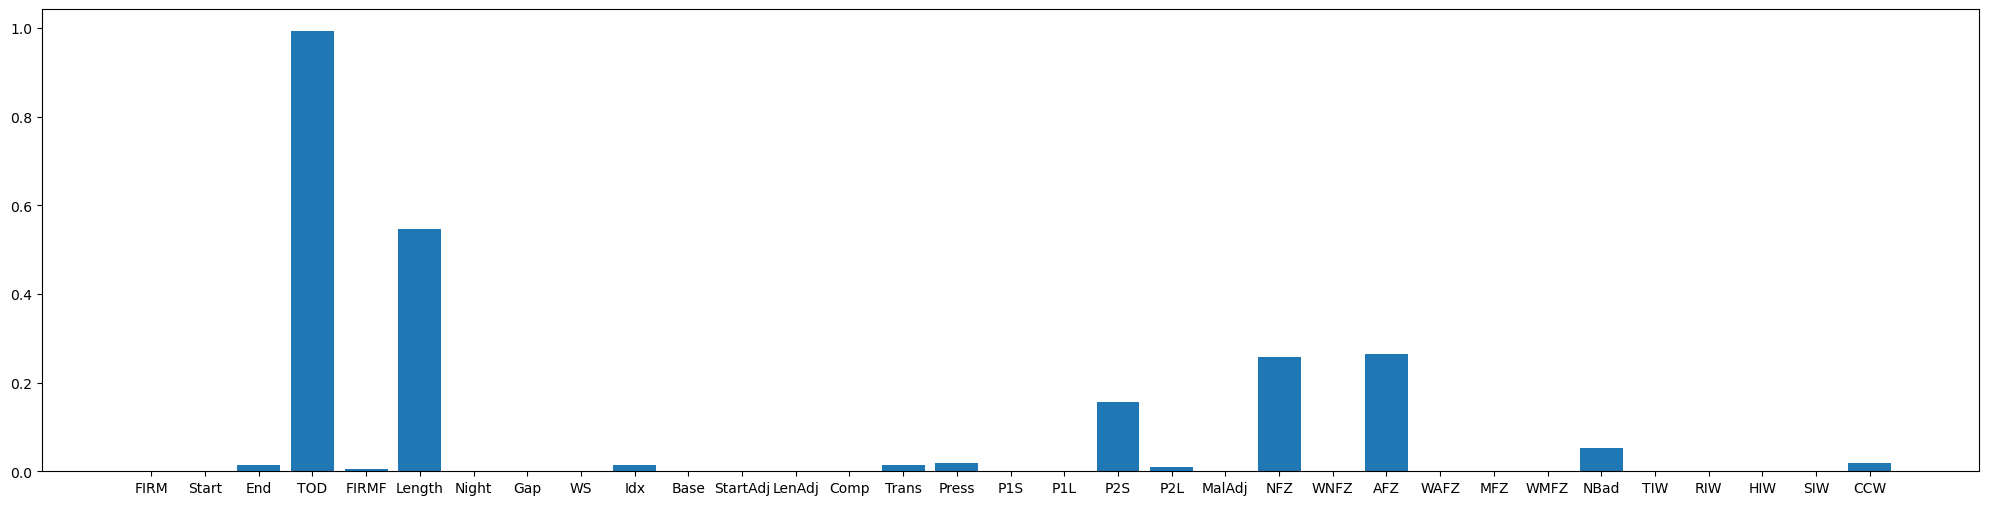

In [46]:
fig, ax = plt.subplots(figsize=(25, 6))
ax.bar(list(df.columns)[:-1], oneColumnF1)
plt.show()

We can see that the features that has the highest F1-Score are the "TOD" followed by "length", "AFZ", "P2S", "NFZ". The remaining columns have an F1-score of less than 0.1. So, let's try only using those 5 columns in the dataframe

In [47]:
importantCol = ["TOD", "Length", "AFZ", "P2S", "NFZ"]
useColumn(df, importantCol)

----Using the ['TOD', 'Length', 'AFZ', 'P2S', 'NFZ'] column----
The accuracy for the training set is 99.93%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]



As we can see, using only these 5 columns, we can achieve a 100% accuracy on the testing dataset. However, I noticed that "P2S" actually had a high inaccuracy when it comes to predicting no accident cases. So I tried to not include "P2S".

In [48]:
importantCol = ["TOD", "Length", "AFZ", "NFZ"]
useColumn(df, importantCol)

----Using the ['TOD', 'Length', 'AFZ', 'NFZ'] column----
The accuracy for the training set is 99.95%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]



As it turns out, the one without "P2S" actually had a slightly higher training accuracy which could suggests that these 4 columns are the most important features to classify the accidents. An important note is that I also tried onyl using 3, 2, or 1 column like not including "NFZ", or not including "AFZ" and "NFZ". However, the results is worse than using all 4 features. An interesting thing is that the columns "Start", "End", "FIRM"/"FIRMF" all don't seem to affect the the accuracy of the model too much. So, let's try to use only those columns.

In [49]:
importantCol = ["Start", "End", "FIRMF"]
useColumn(df, importantCol)

----Using the ['Start', 'End', 'FIRMF'] column----
The accuracy for the training set is 76.46%
The accuracy for the test set is 77.07%
The F1-score for the test set is 53.37%
[[887  68]
 [250 182]]



As we can see, the logistic regession did perform better than when they were placed individually. Howeer, even when we place them together, the accuracy stays the same as shown below. This shows that start, end, and firmf are not important indicators for an accident.

In [50]:
importantCol = ["TOD", "Length", "AFZ", "NFZ", "Start", "End", "FIRMF"]
useColumn(df, importantCol)

----Using the ['TOD', 'Length', 'AFZ', 'NFZ', 'Start', 'End', 'FIRMF'] column----
The accuracy for the training set is 99.95%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]



It seems like, from my testing, the most important features are "TOD", "Length", "AFZ", and "NFZ". If we know the values of these 4 features, the model can accurately predict whether there will be an accident or not 99%-100% of the time.

# Part 3: Which features are not important

To test which features are not important to the logistic regression model, we can do the same thing as we did above. Instead of only using 1 column, we only drop 1 column. If the features are not important, then the accuracy of the model will not drop. So by looking at which combination of features have the same accuracy, we can identify the unimportant features.

In [51]:
def dropColumn(df, colName, f1 = [], random=False):
    print("----Dropping the " + str(colName) + " column----")
    # drop column
    X = df.drop(colName, axis=1, inplace=False)
    # drop "Class"
    X = X.drop("Class", axis=1, inplace=False)
    Y = df["Class"].copy()

    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
    if random:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, stratify=Y)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=38, stratify=Y)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    train_accuracy = model.score(X_train, y_train)
    print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test, y_test)
    print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')
    y_pred = model.predict(X_test)
    test_f1 = f1_score(y_test, y_pred)
    print(f'The F1-score for the test set is {100 * test_f1:.2f}%')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print()
    
    f1.append(test_f1)

In [52]:
dropColumnF1 = []
for columnName in df.columns:
    if (columnName != "Class"):
        dropColumn(df, columnName, dropColumnF1)

----Dropping the FIRM column----
The accuracy for the training set is 99.98%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]

----Dropping the Start column----
The accuracy for the training set is 99.98%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]

----Dropping the End column----
The accuracy for the training set is 99.98%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]

----Dropping the TOD column----
The accuracy for the training set is 90.31%
The accuracy for the test set is 90.05%
The F1-score for the test set is 83.37%
[[903  52]
 [ 86 346]]

----Dropping the FIRMF column----
The accuracy for the training set is 99.98%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]

----Dropping the Length column----
The accuracy for the training set is 99.96%
The accu

In [53]:
dropOnef1Dict = dict(zip(list(df.columns)[:-1], dropColumnF1))
# sort ditionary by value
sorted_dropOnef1Dict = sorted(dropOnef1Dict.items(), key=lambda x:x[1], reverse=True)
print(sorted_dropOnef1Dict)

[('FIRM', 1.0), ('Start', 1.0), ('End', 1.0), ('FIRMF', 1.0), ('Length', 1.0), ('Night', 1.0), ('Gap', 1.0), ('WS', 1.0), ('Idx', 1.0), ('Base', 1.0), ('StartAdj', 1.0), ('LenAdj', 1.0), ('Comp', 1.0), ('Trans', 1.0), ('Press', 1.0), ('P1S', 1.0), ('P1L', 1.0), ('P2S', 1.0), ('P2L', 1.0), ('MalAdj', 1.0), ('WNFZ', 1.0), ('AFZ', 1.0), ('WAFZ', 1.0), ('MFZ', 1.0), ('WMFZ', 1.0), ('NBad', 1.0), ('TIW', 1.0), ('RIW', 1.0), ('HIW', 1.0), ('SIW', 1.0), ('CCW', 1.0), ('NFZ', 0.9965156794425087), ('TOD', 0.8337349397590362)]


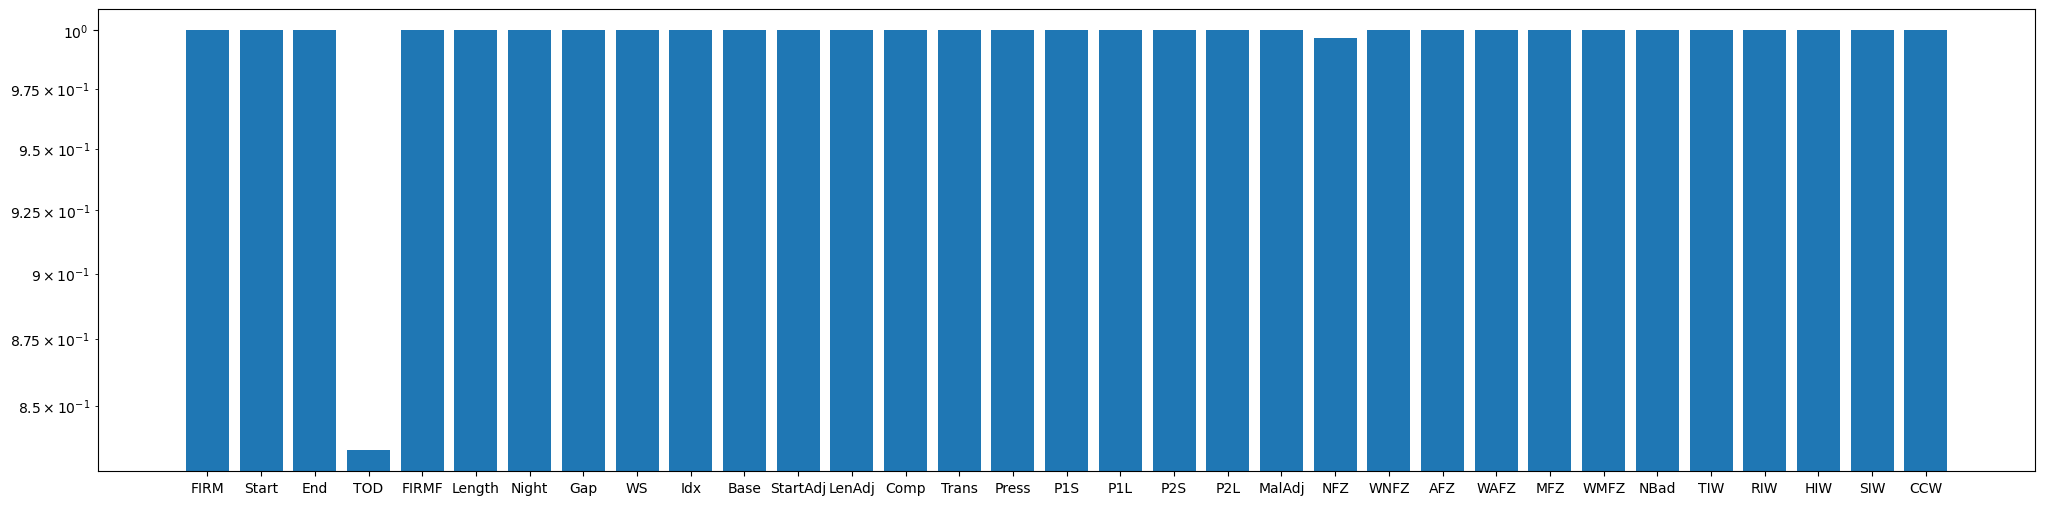

In [54]:
fig, ax = plt.subplots(figsize=(25, 6))
ax.bar(list(df.columns)[:-1], dropColumnF1)
ax.set_yscale('log')
plt.show()

Note that the y-axis is set to a log scale so we can see the difference much clearer.

An interesting thing is that every column except "TOD" and "NFZ" resulted in the same accuracy. In fact, even the confusion matrix doesn't change. So, by this approach it means we remove everything except the "TOD" and "NFZ" columns. That doesn't seem right. So, let's use our tests in part 2 to find the columns that have the lowest F1-score to determine which columns is not needed. The columns that had a 0 in F1 score are "FIRM", "Start", "Night", "Gap", "WS", "Idx", "Base", "StartAdj", "LenAdj", "Comp", "Trans", "P1S", "P1L", "MalAdj", "WNFZ", "WAFZ", "WMFZ", "TIW", "RIW", "SIW". So, let's attempt to remove all of these columns.

In [55]:
colNames = ["FIRM", "Start", "Night", "Gap", "WS", "Idx", "Base", "StartAdj", "LenAdj", 
            "Comp", "Trans", "P1S", "P1L", "MalAdj", "WNFZ", "WAFZ", "WMFZ", "TIW", "RIW", "SIW"]
dropColumn(df, colNames)

----Dropping the ['FIRM', 'Start', 'Night', 'Gap', 'WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW'] column----
The accuracy for the training set is 99.96%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]



As we can see, the F1-score stayed the same despite removing 20 features/columns. However, we can see that the training accuracy is lower than when we just removed one column. It dropped from 99.98% to 99.96%. It's not that big, but there must be a reason why it dropped. 

So I decided to re-add certain columns one by one until I saw a difference in the training accuracy. What I found was that we I re-added the "FIRM", "Start", "Night", and "Gap" columns, the training accuracy went back up to 99.98%. But this seemed suspicious. It might be because those features were good for that random state. If we randomize the training and testing split, we can see if those features are truly better.

In [56]:
list1 = []
list2 = []
for i in range(20):
    colNames = ["FIRM", "Start", "Night", "Gap", "WS", "Idx", "Base", "StartAdj", "LenAdj", 
                "Comp", "Trans", "P1S", "P1L", "MalAdj", "WNFZ", "WAFZ", "WMFZ", "TIW", "RIW", "SIW"]
    dropColumn(df, colNames, f1=list1, random=True)
    colNames2 = ["WS", "Idx", "Base", "StartAdj", "LenAdj", 
                "Comp", "Trans", "P1S", "P1L", "MalAdj", "WNFZ", "WAFZ", "WMFZ", "TIW", "RIW", "SIW"]
    dropColumn(df, colNames2, f1=list2, random=True)

----Dropping the ['FIRM', 'Start', 'Night', 'Gap', 'WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW'] column----
The accuracy for the training set is 99.96%
The accuracy for the test set is 99.93%
The F1-score for the test set is 99.88%
[[955   0]
 [  1 431]]

----Dropping the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW'] column----
The accuracy for the training set is 99.98%
The accuracy for the test set is 99.86%
The F1-score for the test set is 99.77%
[[955   0]
 [  2 430]]

----Dropping the ['FIRM', 'Start', 'Night', 'Gap', 'WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW'] column----
The accuracy for the training set is 99.96%
The accuracy for the test set is 99.93%
The F1-score for the test set is 99.88%
[[955   0]
 [  1 431]]

----Dropping the

The accuracy for the training set is 99.95%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]

----Dropping the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW'] column----
The accuracy for the training set is 99.96%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]

----Dropping the ['FIRM', 'Start', 'Night', 'Gap', 'WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW'] column----
The accuracy for the training set is 99.95%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]

----Dropping the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW'] column----
The accuracy for the training set is 99.96%

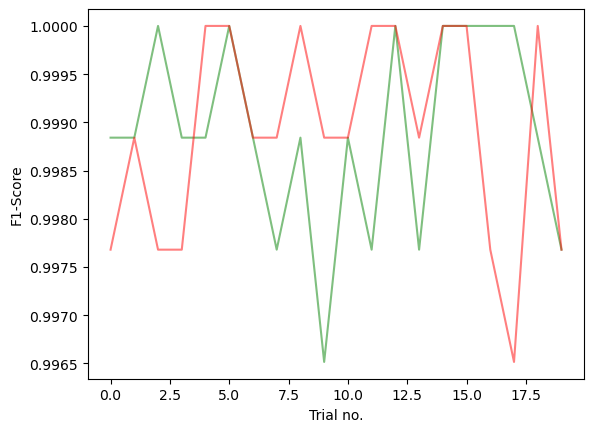

In [57]:
plt.plot(list1, 'g', alpha = 0.5)
plt.plot(list2, 'r', alpha = 0.5)
plt.ylabel("F1-Score")
plt.xlabel("Trial no.")
plt.show()

As we can see, the result's are pretty random. The red line (which includes "FIRM", "Start", "Night", and "Gap") doesn't always appear above the green line. Sometimes, the green line is better than the red line. So, from this test I believe that the difference in accuracy is due to the randomness of the data.

# Part 4: FIRM or FIRMF

In part 2 we saw that neither FIRM or FIRMF are very significant in determining the results. However, in part 3, we saw that only FIRM is included in the list of unimportant features. So we can test which one, FIRM or FIRMF, is better in improving the classification. The first method is just to test them individually like what we did in part 2

In [58]:
importantCol = ["FIRM"]
useColumn(df, importantCol)

importantCol = ["FIRMF"]
useColumn(df, importantCol)

----Using the ['FIRM'] column----
The accuracy for the training set is 68.89%
The accuracy for the test set is 68.85%
The F1-score for the test set is 0.00%
[[955   0]
 [432   0]]

----Using the ['FIRMF'] column----
The accuracy for the training set is 68.81%
The accuracy for the test set is 68.78%
The F1-score for the test set is 0.46%
[[953   2]
 [431   1]]



Using this method, we can see that FIRMF does make the classification better but not by a lot. There is a very smalle difference between the 2 columns. It is important to note that the accuracy of FIRM is better than FIRMF but the F1-score is worse. This could mean that the logistic regression that uses FIRM just predicted no accidents all of the time. Another method that we can try is to add FIRM or FIRMF into our list of important features

In [59]:
list1 = []
list2 = []
for i in range(20):
    importantCol = ["TOD", "Length", "AFZ", "NFZ", "FIRM"]
    useColumn(df, importantCol, f1=list1, random=True)
    importantCol = ["TOD", "Length", "AFZ", "NFZ", "FIRMF"]
    useColumn(df, importantCol, f1=list2, random=True)

----Using the ['TOD', 'Length', 'AFZ', 'NFZ', 'FIRM'] column----
The accuracy for the training set is 99.96%
The accuracy for the test set is 99.93%
The F1-score for the test set is 99.88%
[[955   0]
 [  1 431]]

----Using the ['TOD', 'Length', 'AFZ', 'NFZ', 'FIRMF'] column----
The accuracy for the training set is 99.95%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]

----Using the ['TOD', 'Length', 'AFZ', 'NFZ', 'FIRM'] column----
The accuracy for the training set is 99.96%
The accuracy for the test set is 99.93%
The F1-score for the test set is 99.88%
[[955   0]
 [  1 431]]

----Using the ['TOD', 'Length', 'AFZ', 'NFZ', 'FIRMF'] column----
The accuracy for the training set is 99.96%
The accuracy for the test set is 99.93%
The F1-score for the test set is 99.88%
[[955   0]
 [  1 431]]

----Using the ['TOD', 'Length', 'AFZ', 'NFZ', 'FIRM'] column----
The accuracy for the training set is 99.96%
The accuracy for the test set is 99

The accuracy for the training set is 99.95%
The accuracy for the test set is 100.00%
The F1-score for the test set is 100.00%
[[955   0]
 [  0 432]]



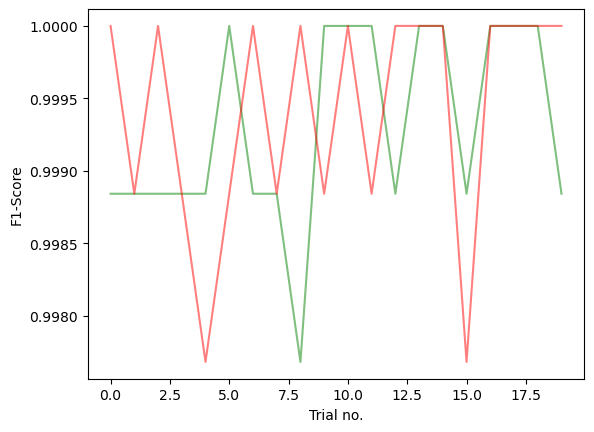

In [60]:
plt.plot(list1, 'g', alpha = 0.5)
plt.plot(list2, 'r', alpha = 0.5)
plt.ylabel("F1-Score")
plt.xlabel("Trial no.")
plt.show()

Now, we see that the 2 models perform the same. Since the 4 features were able to very accurately predict an accident, adding another feature doesn't tell us a whole lot about which column is better. Perhaps we can use only 1 column like "TOD" plus the "FIRM" or "FIRMF" to compare

In [61]:
list1 = []
list2 = []
for i in range(20):
    importantCol = ["TOD", "FIRM"]
    useColumn(df, importantCol, f1=list1, random=True)
    importantCol = ["TOD", "FIRMF"]
    useColumn(df, importantCol, f1=list2, random=True)

----Using the ['TOD', 'FIRM'] column----
The accuracy for the training set is 99.69%
The accuracy for the test set is 99.50%
The F1-score for the test set is 99.18%
[[955   0]
 [  7 425]]

----Using the ['TOD', 'FIRMF'] column----
The accuracy for the training set is 99.64%
The accuracy for the test set is 99.50%
The F1-score for the test set is 99.18%
[[955   0]
 [  7 425]]

----Using the ['TOD', 'FIRM'] column----
The accuracy for the training set is 99.69%
The accuracy for the test set is 99.50%
The F1-score for the test set is 99.18%
[[955   0]
 [  7 425]]

----Using the ['TOD', 'FIRMF'] column----
The accuracy for the training set is 99.66%
The accuracy for the test set is 99.42%
The F1-score for the test set is 99.07%
[[955   0]
 [  8 424]]

----Using the ['TOD', 'FIRM'] column----
The accuracy for the training set is 99.71%
The accuracy for the test set is 99.42%
The F1-score for the test set is 99.07%
[[955   0]
 [  8 424]]

----Using the ['TOD', 'FIRMF'] column----
The accurac

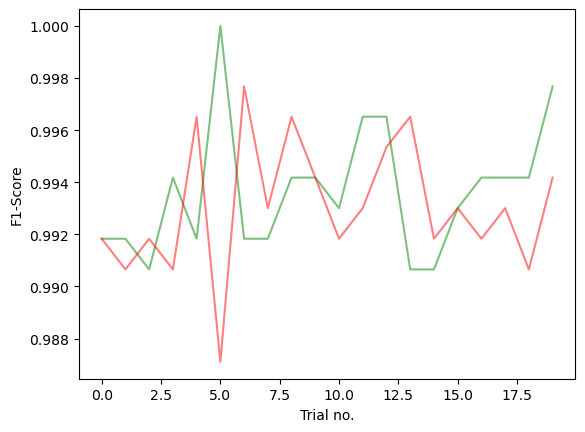

In [62]:
plt.plot(list1, 'g', alpha = 0.5)
plt.plot(list2, 'r', alpha = 0.5)
plt.ylabel("F1-Score")
plt.xlabel("Trial no.")
plt.show()

In [63]:
print(f"Mean F1-Score of using FIRM {sum(list1)/len(list1):.5f}")
print(f"Mean F1-Score of using FIRMF {sum(list2)/len(list2):.5f}")

Mean F1-Score of using FIRM 0.99365
Mean F1-Score of using FIRMF 0.99306


Again, we see the same story. There is very litle difference between using FIRM and FIRMF. I ran this portion multiple times and the mean f1-score tends to hover around the same value. Sometimes, FIRM has a higher average and other times FIRMF has a higher average. Next, I tried the other important columns. Perhaps, TOD was skewing the model's accuracy too much, and so by using other columns, the FIRM and FIRMF can have a higher impoact on the model.

In [64]:
list1 = []
list2 = []
for i in range(20):
    importantCol = ["Length", "AFZ", "NFZ", "FIRM"]
    useColumn(df, importantCol, f1=list1, random=True)
    importantCol = ["Length", "AFZ", "NFZ", "FIRMF"]
    useColumn(df, importantCol, f1=list2, random=True)

----Using the ['Length', 'AFZ', 'NFZ', 'FIRM'] column----
The accuracy for the training set is 81.71%
The accuracy for the test set is 81.83%
The F1-score for the test set is 62.05%
[[929  26]
 [226 206]]

----Using the ['Length', 'AFZ', 'NFZ', 'FIRMF'] column----
The accuracy for the training set is 80.93%
The accuracy for the test set is 80.89%
The F1-score for the test set is 59.29%
[[929  26]
 [239 193]]

----Using the ['Length', 'AFZ', 'NFZ', 'FIRM'] column----
The accuracy for the training set is 81.53%
The accuracy for the test set is 81.69%
The F1-score for the test set is 60.80%
[[936  19]
 [235 197]]

----Using the ['Length', 'AFZ', 'NFZ', 'FIRMF'] column----
The accuracy for the training set is 80.86%
The accuracy for the test set is 80.97%
The F1-score for the test set is 59.76%
[[927  28]
 [236 196]]

----Using the ['Length', 'AFZ', 'NFZ', 'FIRM'] column----
The accuracy for the training set is 81.93%
The accuracy for the test set is 80.89%
The F1-score for the test set is

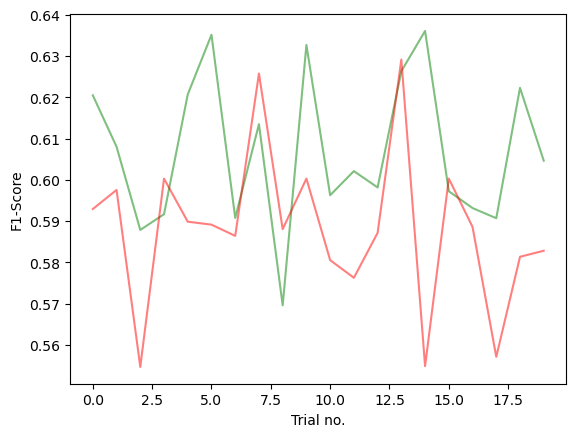

In [65]:
plt.plot(list1, 'g', alpha = 0.5)
plt.plot(list2, 'r', alpha = 0.5)
plt.ylabel("F1-Score")
plt.xlabel("Trial no.")
plt.show()

In [66]:
print(f"Mean F1-Score of using FIRM {sum(list1)/len(list1):.5f}")
print(f"Mean F1-Score of using FIRMF {sum(list2)/len(list2):.5f}")

Mean F1-Score of using FIRM 0.60687
Mean F1-Score of using FIRMF 0.58816


Once again, both FIRM and FIRMF performs similarly. I ran this test multiple times and the values tend to fluctuate around 0.6 and either column can perform better than the other. I also tried to use the unimportant columns.

In [67]:
list1 = []
list2 = []
for i in range(20):
    importantCol = ["WS", "Idx", "Base", "StartAdj", "LenAdj", 
                "Comp", "Trans", "P1S", "P1L", "MalAdj", "WNFZ", "WAFZ", "WMFZ", "TIW", "RIW", "SIW", "FIRM"]
    useColumn(df, importantCol, f1=list1, random=True)
    importantCol = ["WS", "Idx", "Base", "StartAdj", "LenAdj", 
                "Comp", "Trans", "P1S", "P1L", "MalAdj", "WNFZ", "WAFZ", "WMFZ", "TIW", "RIW", "SIW", "FIRMF"]
    useColumn(df, importantCol, f1=list2, random=True)

----Using the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW', 'FIRM'] column----
The accuracy for the training set is 80.34%
The accuracy for the test set is 80.39%
The F1-score for the test set is 62.12%
[[892  63]
 [209 223]]

----Using the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW', 'FIRMF'] column----
The accuracy for the training set is 80.70%
The accuracy for the test set is 80.17%
The F1-score for the test set is 63.09%
[[877  78]
 [197 235]]

----Using the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW', 'FIRM'] column----
The accuracy for the training set is 80.18%
The accuracy for the test set is 80.17%
The F1-score for the test set is 62.89%
[[879  76]
 [199 233]]

----Using the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 

The accuracy for the training set is 80.59%
The accuracy for the test set is 78.01%
The F1-score for the test set is 57.70%
[[874  81]
 [224 208]]

----Using the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW', 'FIRM'] column----
The accuracy for the training set is 80.18%
The accuracy for the test set is 79.88%
The F1-score for the test set is 63.05%
[[870  85]
 [194 238]]

----Using the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW', 'FIRMF'] column----
The accuracy for the training set is 80.28%
The accuracy for the test set is 79.38%
The F1-score for the test set is 60.50%
[[882  73]
 [213 219]]

----Using the ['WS', 'Idx', 'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'P1S', 'P1L', 'MalAdj', 'WNFZ', 'WAFZ', 'WMFZ', 'TIW', 'RIW', 'SIW', 'FIRM'] column----
The accuracy for the training set is 80.14%
The accuracy for the t

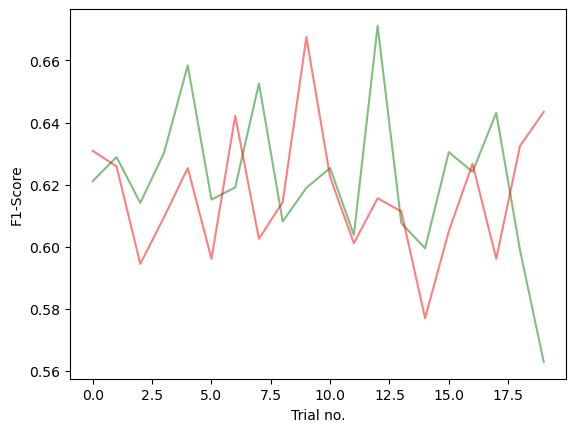

In [68]:
plt.plot(list1, 'g', alpha = 0.5)
plt.plot(list2, 'r', alpha = 0.5)
plt.ylabel("F1-Score")
plt.xlabel("Trial no.")
plt.show()

In [69]:
print(f"Mean F1-Score of using FIRM {sum(list1)/len(list1):.5f}")
print(f"Mean F1-Score of using FIRMF {sum(list2)/len(list2):.5f}")

Mean F1-Score of using FIRM 0.62168
Mean F1-Score of using FIRMF 0.61699


Even using the unimportant columns, FIRM and FIRMF are still very close to each other after multiple tests. 

All of these tests show that, although there is a difference between using FIRM and FIRMF, the difference is very tiny. In an isolated environment, FIRMF performs better than FIRM but only by a bit. However, when we combine FIRM or FIRMF with other columns, then the difference in performance comes down to sight variations in the randomness of the data. In summary, there is no noticable difference between using FIRM and FIRMF. 